In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import time
import datetime
import plotly  
import plotly.express as px
from datetime import datetime
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
csv = pd.read_csv('/Users/xuzhejia/Downloads/複本 來源資料_TO中大.csv')
csv = csv.iloc[2:,:]
csv.columns = csv.iloc[1,:]
csv = csv.dropna()
csv = csv.iloc[1:,:]

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
summary = []
for x in csv['合計']:
    summary.append(x.replace(",",""))
csv['合計'] = summary
csv['合計'] = csv['合計'].astype(int)

In [4]:
csv_groupby_brand_year = csv.groupby(["品牌",'年'])

In [5]:
csv_groupby_brand_year.get_group(('ABARTH', 2016))

3,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計
68289,2016,12,1,ABARTH,進口,轎車,ECOI,695 TRIBUTO FERRARI,1


In [6]:
group = []
brand_year_sum = []
for x,y in csv_groupby_brand_year:
    group.append(x)
for x in group:
    brand_year_sum.append((csv_groupby_brand_year.get_group(x))['合計'].sum())

In [7]:
brand_year_df = pd.DataFrame([group,brand_year_sum]).T
brand_year_df

,0,1
0,"(ABARTH, 2016)",1
1,"(ABARTH, 2017)",20
2,"(ABARTH, 2018)",20
3,"(ABARTH, 2019)",13
4,"(ABARTH, 2020)",18
...,...,...
644,"(福田, 2020)",1
645,"(福田, 2013)",76
646,"(福田, 2014)",229
647,"(福田, 2015)",75


In [8]:
brand_year_df['brand'] = brand_year_df[0].map(lambda x:x[0])
brand_year_df['year'] = brand_year_df[0].map(lambda x:x[1])
brand_year_df

,0,1,brand,year
0,"(ABARTH, 2016)",1,ABARTH,2016
1,"(ABARTH, 2017)",20,ABARTH,2017
2,"(ABARTH, 2018)",20,ABARTH,2018
3,"(ABARTH, 2019)",13,ABARTH,2019
4,"(ABARTH, 2020)",18,ABARTH,2020
...,...,...,...,...
644,"(福田, 2020)",1,福田,2020
645,"(福田, 2013)",76,福田,2013
646,"(福田, 2014)",229,福田,2014
647,"(福田, 2015)",75,福田,2015


In [9]:
brand_year_df[brand_year_df['brand'] == 'BMW']

,0,1,brand,year
89,"(BMW, 2016)",4447,BMW,2016
90,"(BMW, 2017)",14922,BMW,2017
91,"(BMW, 2018)",13915,BMW,2018
92,"(BMW, 2019)",14170,BMW,2019
93,"(BMW, 2020)",15137,BMW,2020
94,"(BMW, 2021)",14927,BMW,2021
95,"(BMW, 2022)",1834,BMW,2022
96,"(BMW, 2012)",10864,BMW,2012
97,"(BMW, 2013)",11975,BMW,2013
98,"(BMW, 2014)",13356,BMW,2014


In [10]:
brand_year_df

,0,1,brand,year
0,"(ABARTH, 2016)",1,ABARTH,2016
1,"(ABARTH, 2017)",20,ABARTH,2017
2,"(ABARTH, 2018)",20,ABARTH,2018
3,"(ABARTH, 2019)",13,ABARTH,2019
4,"(ABARTH, 2020)",18,ABARTH,2020
...,...,...,...,...
644,"(福田, 2020)",1,福田,2020
645,"(福田, 2013)",76,福田,2013
646,"(福田, 2014)",229,福田,2014
647,"(福田, 2015)",75,福田,2015


In [11]:
brand_year_df['year'] = brand_year_df['year'].astype(int)

In [12]:
audi = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'AUDI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'AUDI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 174, 250, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='AUDI']['brand']
                ,name = "AUDI")

benz = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'BENZ'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'BENZ'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(1000, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='BENZ']['brand'],name = 'BENZ')
bmw = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'BMW'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'BMW'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(80, 400, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='BMW']['brand'],name = 'BMW')
honda = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'HONDA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'HONDA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='HONDA']['brand'],name = "HONDA")
hyundai = go.Bar(
                x =brand_year_df[brand_year_df['brand'] == 'HYUNDAI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'HYUNDAI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 20, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='HYUNDAI']['brand'],name = "HYUNDAI")
jaguar = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'JAGUAR'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'JAGUAR'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 14)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='JAGUAR']['brand'],name = 'JAUGAR')
landrover = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'LAND ROVER'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'LAND ROVER'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(99, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='LAND ROVER']['brand'],name = 'LAND ROVER')
mazada = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'MAZADA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'MAZADA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174,130, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='MAZADA']['brand'],name = "MAZADA")
nissan = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'NISSAN'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'NISSAN'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 100, 155, 15)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='NISSAN']['brand'],name = 'NISSAN')
mitsubishi = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'MITSUBISHI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'MITSUBISHI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(2, 174, 255, 500)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='MITSUBISHI']['brand'],name = 'MITSUBISHI')
porsche = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'PORSCHE'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'PORSCHE'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 255, 450)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='PORSCHE']['brand'],name = 'PORSCHE')
skoda = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'SKODA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SKODA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 14, 5, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SKODA']['brand'],name = 'SKODA')
subaru = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'SUBARU'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SUBARU'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(75, 174, 255, 940)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SUBARU']['brand'],name = 'SUBARU')
suzuki = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'SUZUKI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SUZUKI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 5, 400)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SUZUKI']['brand'],name = 'SUZUKI')
TESLA = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'TESLA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'TESLA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(500, 400, 55, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='TESLA']['brand'],name = 'TESLA')
TOYOTA = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'TOYOTA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'TOYOTA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 40, 50, 4)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='TOYOTA']['brand'],name = 'TOYOTA')
VOLVO = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'VOLVO'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'VOLVO'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='VOLVO']['brand'],name = 'VOLVO')
VW = go.Bar(
                x = brand_year_df[brand_year_df['brand'] == 'VW'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'VW'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='VW']['brand'],name = 'VW')

data = [audi,benz,bmw,honda,hyundai,jaguar,landrover,mazada,mitsubishi,porsche,skoda,subaru,suzuki,TESLA,TOYOTA,VOLVO,VW]
#layout = go.Layout(barmode = "group")   
layout = go.Layout(width = 1000, height = 800,barmode = "stack")  
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [13]:

fig = px.pie(brand_year_df[brand_year_df['year'] == 2022],names = 'brand', values = 1,width = 1000)
fig.update_traces(textposition='inside', 
                      textinfo='percent+label',
                        title = 'year2022'
                  )

In [14]:
audi = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'AUDI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'AUDI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 174, 250, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='AUDI']['brand']
                ,name = "AUDI")

benz = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'BENZ'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'BENZ'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(1000, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='BENZ']['brand'],name = 'BENZ')
bmw = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'BMW'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'BMW'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(80, 400, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='BMW']['brand'],name = 'BMW')
honda = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'HONDA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'HONDA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='HONDA']['brand'],name = "HONDA")
hyundai = go.Line(
                x =brand_year_df[brand_year_df['brand'] == 'HYUNDAI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'HYUNDAI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 20, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='HYUNDAI']['brand'],name = "HYUNDAI")
jaguar = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'JAGUAR'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'JAGUAR'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 14)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='JAGUAR']['brand'],name = 'JAUGAR')
landrover = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'LAND ROVER'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'LAND ROVER'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(99, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='LAND ROVER']['brand'],name = 'LAND ROVER')
mazada = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'MAZADA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'MAZADA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174,130, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='MAZADA']['brand'],name = "MAZADA")
nissan = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'NISSAN'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'NISSAN'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 100, 155, 15)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='NISSAN']['brand'],name = 'NISSAN')
mitsubishi = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'MITSUBISHI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'MITSUBISHI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(2, 174, 255, 500)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='MITSUBISHI']['brand'],name = 'MITSUBISHI')
porsche = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'PORSCHE'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'PORSCHE'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 255, 450)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='PORSCHE']['brand'],name = 'PORSCHE')
skoda = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'SKODA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SKODA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 14, 5, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SKODA']['brand'],name = 'SKODA')
subaru = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'SUBARU'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SUBARU'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(75, 174, 255, 940)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SUBARU']['brand'],name = 'SUBARU')
suzuki = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'SUZUKI'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'SUZUKI'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 1, 5, 400)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='SUZUKI']['brand'],name = 'SUZUKI')
TESLA = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'TESLA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'TESLA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(500, 400, 55, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='TESLA']['brand'],name = 'TESLA')
TOYOTA = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'TOYOTA'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'TOYOTA'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(5, 40, 50, 4)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='TOYOTA']['brand'],name = 'TOYOTA')
VOLVO = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'VOLVO'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'VOLVO'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='VOLVO']['brand'],name = 'VOLVO')
VW = go.Line(
                x = brand_year_df[brand_year_df['brand'] == 'VW'].groupby('year')[1].sum().index,
                y = brand_year_df[brand_year_df['brand'] == 'VW'].groupby('year')[1].sum(),
                marker = dict(color = 'rgba(255, 174, 255, 40)',
                             line=dict(color='rgb(0,0,0)',width=0.5))
                ,text = brand_year_df[brand_year_df['brand']=='VW']['brand'],name = 'VW')

data = [audi,benz,bmw,honda,hyundai,jaguar,landrover,mazada,mitsubishi,porsche,skoda,subaru,suzuki,TESLA,TOYOTA,VOLVO,VW]
#layout = go.Layout(barmode = "group")   
layout = go.Layout(width = 1000, height = 800,barmode = "stack")  
fig = go.Figure(data = data, layout = layout)
iplot(fig)


/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [218]:
brand_year_month = csv.groupby(['品牌','年','月'])
group_year_month = []
for x,y in brand_year_month:
    group_year_month.append(x)
group_year_month

[('ABARTH', 2016, 12),
 ('ABARTH', 2017, 3),
 ('ABARTH', 2017, 4),
 ('ABARTH', 2017, 6),
 ('ABARTH', 2017, 7),
 ('ABARTH', 2017, 8),
 ('ABARTH', 2017, 9),
 ('ABARTH', 2017, 10),
 ('ABARTH', 2017, 11),
 ('ABARTH', 2017, 12),
 ('ABARTH', 2018, 1),
 ('ABARTH', 2018, 2),
 ('ABARTH', 2018, 3),
 ('ABARTH', 2018, 4),
 ('ABARTH', 2018, 5),
 ('ABARTH', 2018, 6),
 ('ABARTH', 2018, 7),
 ('ABARTH', 2018, 8),
 ('ABARTH', 2018, 9),
 ('ABARTH', 2018, 11),
 ('ABARTH', 2018, 12),
 ('ABARTH', 2019, 1),
 ('ABARTH', 2019, 3),
 ('ABARTH', 2019, 4),
 ('ABARTH', 2019, 5),
 ('ABARTH', 2019, 6),
 ('ABARTH', 2019, 8),
 ('ABARTH', 2019, 10),
 ('ABARTH', 2019, 11),
 ('ABARTH', 2019, 12),
 ('ABARTH', 2020, 1),
 ('ABARTH', 2020, 2),
 ('ABARTH', 2020, 4),
 ('ABARTH', 2020, 5),
 ('ABARTH', 2020, 6),
 ('ABARTH', 2020, 7),
 ('ABARTH', 2020, 9),
 ('ABARTH', 2020, 10),
 ('ABARTH', 2020, 11),
 ('ABARTH', 2020, 12),
 ('ABARTH', 2021, 1),
 ('ABARTH', 2021, 3),
 ('ABARTH', 2021, 5),
 ('ABARTH', 2021, 6),
 ('ABARTH', 2021, 7)

In [219]:
group_year_month_sum =[]
for x in group_year_month:
    group_year_month_sum.append(brand_year_month.get_group(x)['合計'].sum())

In [220]:
df = pd.DataFrame([group_year_month_sum,group_year_month]).T
df

,0,1
0,1,"(ABARTH, 2016, 12)"
1,1,"(ABARTH, 2017, 3)"
2,2,"(ABARTH, 2017, 4)"
3,3,"(ABARTH, 2017, 6)"
4,2,"(ABARTH, 2017, 7)"
...,...,...
5287,5,"(福田, 2016, 5)"
5288,7,"(福田, 2016, 6)"
5289,5,"(福田, 2016, 7)"
5290,5,"(福田, 2016, 8)"


In [221]:
df['brand'] = df[1].apply(lambda x:x[0])
df['time'] = df[1].apply(lambda x:str(x[1]) + '/' + str(x[2]))

In [222]:
df['time_strptime'] = df['time'].apply(lambda x:datetime.strptime(x,"%Y/%m"))


In [223]:
df_time = df[df['time_strptime'] > datetime.strptime('2018-01-01','%Y-%m-%d')]
df_time

,0,1,brand,time,time_strptime
11,1,"(ABARTH, 2018, 2)",ABARTH,2018/2,2018-02-01
12,1,"(ABARTH, 2018, 3)",ABARTH,2018/3,2018-03-01
13,3,"(ABARTH, 2018, 4)",ABARTH,2018/4,2018-04-01
14,1,"(ABARTH, 2018, 5)",ABARTH,2018/5,2018-05-01
15,3,"(ABARTH, 2018, 6)",ABARTH,2018/6,2018-06-01
...,...,...,...,...,...
5248,1,"(福田, 2019, 4)",福田,2019/4,2019-04-01
5249,1,"(福田, 2019, 5)",福田,2019/5,2019-05-01
5250,1,"(福田, 2019, 8)",福田,2019/8,2019-08-01
5251,1,"(福田, 2019, 9)",福田,2019/9,2019-09-01


In [224]:
audi = go.Line(x = df_time[df_time['brand'] == 'AUDI'].time_strptime,y = df_time[df_time['brand']=='AUDI'][0],name = 'AUDI')
bmw = go.Line(x = df_time[df_time['brand'] == 'BMW'].time_strptime,y = df_time[df_time['brand']=='BMW'][0],name = 'BMW')
toyota = go.Line(x = df_time[df_time['brand'] == 'TOYOTA'].time_strptime,y = df_time[df_time['brand']=='TOYOTA'][0],name = 'TOYOTA')
nissan = go.Line(x = df_time[df_time['brand'] == 'NISSAN'].time_strptime,y = df_time[df_time['brand']=='NISSAN'][0],name = 'NISSAN')
benz = go.Line(x = df_time[df_time['brand'] == 'BENZ'].time_strptime,y = df_time[df_time['brand']=='BENZ'][0],name = 'BENZ')
honda = go.Line(x = df_time[df_time['brand'] == 'HONDA'].time_strptime,y = df_time[df_time['brand']=='HONDA'][0],name = 'HONDA')
hyundai = go.Line(x = df_time[df_time['brand'] == 'HYUNDAI'].time_strptime,y = df_time[df_time['brand'] == 'HYUNDAI'][0],name = 'HYUNDAI')
jaguar = go.Line(x = df_time[df_time['brand'] == 'JAGUAR'].time_strptime,y = df_time[df_time['brand']=='JAGUAR'][0],name = 'JAGUAR')
mazada = go.Line(x = df_time[df_time['brand'] == 'MAZADA'].time_strptime,y = df_time[df_time['brand']=='MAZADA'][0],name = 'MAZADA')
mitsubishi = go.Line(x = df_time[df_time['brand'] == 'MITSUBISHI'].time_strptime,y = df_time[df_time['brand']=='MITSUBISHI'][0],name = 'MITSUBISHI')
porsche = go.Line(x = df_time[df_time['brand'] == 'PORSCHE'].time_strptime,y = df_time[df_time['brand']=='PORSCHE'][0],name = 'PORSCHE')
skoda = go.Line(x = df_time[df_time['brand'] == 'SKODA'].time_strptime,y = df_time[df_time['brand']=='SKODA'][0],name = 'SKODA')
sabaru = go.Line(x = df_time[df_time['brand'] == 'SABARU'].time_strptime,y = df_time[df_time['brand']=='SABARU'][0],name = 'SABARU')
suzuki = go.Line(x = df_time[df_time['brand'] == 'SUZUKI'].time_strptime,y = df_time[df_time['brand']=='SUZUKI'][0],name = 'SUZUKI')
tesla = go.Line(x = df_time[df_time['brand'] == 'TESLA'].time_strptime,y = df_time[df_time['brand']=='TESLA'][0],name = 'TESLA')
volvo = go.Line(x = df_time[df_time['brand'] == 'VOLVO'].time_strptime,y = df_time[df_time['brand']=='VOLVO'][0],name = 'VOLVO')
vw = go.Line(x = df_time[df_time['brand'] == 'VW'].time_strptime,y = df_time[df_time['brand']=='VW'][0],name = 'VW')
data = [audi,bmw,toyota,nissan,benz,honda,hyundai,jaguar,mazada,mitsubishi,porsche,skoda,sabaru,suzuki,tesla,volvo,vw]
layout = go.Layout(width = 1000, height = 600,barmode = "group")  
fig = go.Figure(data = data, layout = layout)
iplot(fig)

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [225]:
brand_year_df_2012 = brand_year_df[brand_year_df['year'] == 2012].iloc[:,[1,2,3]]
brand_year_df_2013 = brand_year_df[brand_year_df['year'] == 2013].iloc[:,[1,2,3]]
brand_year_df_2014 = brand_year_df[brand_year_df['year'] == 2014].iloc[:,[1,2,3]]
brand_year_df_2015 = brand_year_df[brand_year_df['year'] == 2015].iloc[:,[1,2,3]]
brand_year_df_2016 = brand_year_df[brand_year_df['year'] == 2016].iloc[:,[1,2,3]]
brand_year_df_2017 = brand_year_df[brand_year_df['year'] == 2017].iloc[:,[1,2,3]]
brand_year_df_2018 = brand_year_df[brand_year_df['year'] == 2018].iloc[:,[1,2,3]]
brand_year_df_2019 = brand_year_df[brand_year_df['year'] == 2019].iloc[:,[1,2,3]]
brand_year_df_2020 = brand_year_df[brand_year_df['year'] == 2020].iloc[:,[1,2,3]]
brand_year_df_2021 = brand_year_df[brand_year_df['year'] == 2021].iloc[:,[1,2,3]]
brand_year_df_2022 = brand_year_df[brand_year_df['year'] == 2022].iloc[:,[1,2,3]]

In [226]:
brand_year_df_2012['pro'] = brand_year_df_2012[1].apply(lambda x:x/sum(brand_year_df_2012[1]))
brand_year_df_2013['pro'] = brand_year_df_2013[1].apply(lambda x:x/sum(brand_year_df_2013[1]))
brand_year_df_2014['pro'] = brand_year_df_2014[1].apply(lambda x:x/sum(brand_year_df_2014[1]))
brand_year_df_2015['pro'] = brand_year_df_2015[1].apply(lambda x:x/sum(brand_year_df_2015[1]))
#brand_year_df_2016['pro'] = brand_year_df_2016[1].apply(lambda x:x/sum(brand_year_df_2016[1]))
brand_year_df_2017['pro'] = brand_year_df_2017[1].apply(lambda x:x/sum(brand_year_df_2017[1]))
brand_year_df_2018['pro'] = brand_year_df_2018[1].apply(lambda x:x/sum(brand_year_df_2018[1]))
brand_year_df_2019['pro'] = brand_year_df_2019[1].apply(lambda x:x/sum(brand_year_df_2019[1]))
brand_year_df_2020['pro'] = brand_year_df_2020[1].apply(lambda x:x/sum(brand_year_df_2020[1]))
brand_year_df_2021['pro'] = brand_year_df_2021[1].apply(lambda x:x/sum(brand_year_df_2021[1]))
brand_year_df_2022['pro'] = brand_year_df_2022[1].apply(lambda x:x/sum(brand_year_df_2022[1]))

In [227]:
pro = pd.concat([brand_year_df_2012,brand_year_df_2013,brand_year_df_2014,brand_year_df_2015,brand_year_df_2017,brand_year_df_2018
      ,brand_year_df_2019,brand_year_df_2020,brand_year_df_2021,brand_year_df_2022])
pro

,1,brand,year,pro
7,4,ABARTH,2012,0.000013
25,2,ALFA,2012,0.000007
36,2,ALPINA,2012,0.000007
48,34,ASTON MARTIN,2012,0.000112
60,3387,AUDI,2012,0.011135
...,...,...,...,...
584,148,TESLA,2022,0.003540
598,15859,TOYOTA,2022,0.379357
610,564,VOLVO,2022,0.013491
622,1261,VW,2022,0.030164


In [228]:
pro_1 = pro[pro['pro'] > 0.045]
pro_1

,1,brand,year,pro
215,15963,FORD,2012,0.052481
233,15711,HONDA,2012,0.051652
428,41796,MITSUBISHI,2012,0.137410
451,37122,NISSAN,2012,0.122044
599,107774,TOYOTA,2012,0.354323
...,...,...,...,...
214,2199,FORD,2022,0.052601
232,2935,HONDA,2022,0.070207
427,4075,MITSUBISHI,2022,0.097476
450,3408,NISSAN,2022,0.081521


In [229]:
brand_year_df_2016.groupby("brand")

In [230]:
num = []
for x in brand_year_df_2016['brand'].unique():
    num_1 = []
    for y in range(0,len(brand_year_df_2016)):
        if brand_year_df_2016.iloc[y,1] == x:
            num_1.append(brand_year_df_2016.iloc[y,0])
    num.append(num_1)
num

[[1],
 [1],
 [4, 16],
 [1, 7],
 [9, 30],
 [996, 2887],
 [30, 78],
 [5390, 16028],
 [4447, 11210],
 [1],
 [3, 4],
 [3, 3],
 [2, 3],
 [1],
 [9, 15],
 [11, 37],
 [218],
 [4],
 [12, 62],
 [6, 19],
 [5040, 11111],
 [7128, 15044],
 [1, 2],
 [3108, 7693],
 [306, 776],
 [46, 131],
 [56, 168],
 [797, 1569],
 [11, 40],
 [98, 291],
 [1],
 [1, 8],
 [3535, 9263],
 [10, 4],
 [96, 215],
 [6148, 13164],
 [9, 29],
 [474, 1012],
 [10408, 27849],
 [1],
 [1, 3],
 [9887, 26667],
 [1],
 [1],
 [316, 509],
 [876, 2012],
 [1],
 [9, 17],
 [1],
 [1, 1],
 [2, 5],
 [906, 2547],
 [25, 91],
 [1675, 4415],
 [1827, 3340],
 [2, 4],
 [35598, 80594],
 [1150, 2347],
 [2854, 5514],
 [87, 184],
 [5, 54]]

In [231]:
num_2 = []
year = []
for x in num:
    num_2.append(sum(x))
year_2016 = pd.DataFrame([brand_year_df_2016['brand'].unique(),num_2]).T
year_2016['pro'] = year_2016[1].apply(lambda x:x/year_2016[1].sum())
for x in range(61):
    year.append("2016")
year_2016['year'] = year
year_2016

,0,1,pro,year
0,ABARTH,1,0.000003,2016
1,ACURA,1,0.000003,2016
2,ALFA,20,0.000057,2016
3,ALPINA,8,0.000023,2016
4,ASTON MARTIN,39,0.000111,2016
...,...,...,...,...
56,TOYOTA,116192,0.331296,2016
57,VOLVO,3497,0.009971,2016
58,VW,8368,0.023859,2016
59,東風小康,271,0.000773,2016


In [232]:
pro_1

,1,brand,year,pro
215,15963,FORD,2012,0.052481
233,15711,HONDA,2012,0.051652
428,41796,MITSUBISHI,2012,0.137410
451,37122,NISSAN,2012,0.122044
599,107774,TOYOTA,2012,0.354323
...,...,...,...,...
214,2199,FORD,2022,0.052601
232,2935,HONDA,2022,0.070207
427,4075,MITSUBISHI,2022,0.097476
450,3408,NISSAN,2022,0.081521


In [233]:
year_2016.columns = ['brand',1,'pro','year']

In [234]:
pro_final = pd.concat([pro_1,year_2016])

In [235]:
pro_final['year_strptime'] = pro_final['year'].apply(lambda x:datetime.strptime(str(x),"%Y"))
pro_final

,1,brand,year,pro,year_strptime
215,15963,FORD,2012,0.052481,2012-01-01
233,15711,HONDA,2012,0.051652,2012-01-01
428,41796,MITSUBISHI,2012,0.137410,2012-01-01
451,37122,NISSAN,2012,0.122044,2012-01-01
599,107774,TOYOTA,2012,0.354323,2012-01-01
...,...,...,...,...,...
56,116192,TOYOTA,2016,0.331296,2016-01-01
57,3497,VOLVO,2016,0.009971,2016-01-01
58,8368,VW,2016,0.023859,2016-01-01
59,271,東風小康,2016,0.000773,2016-01-01


In [236]:
pro_final = pro_final.sort_values("year_strptime")

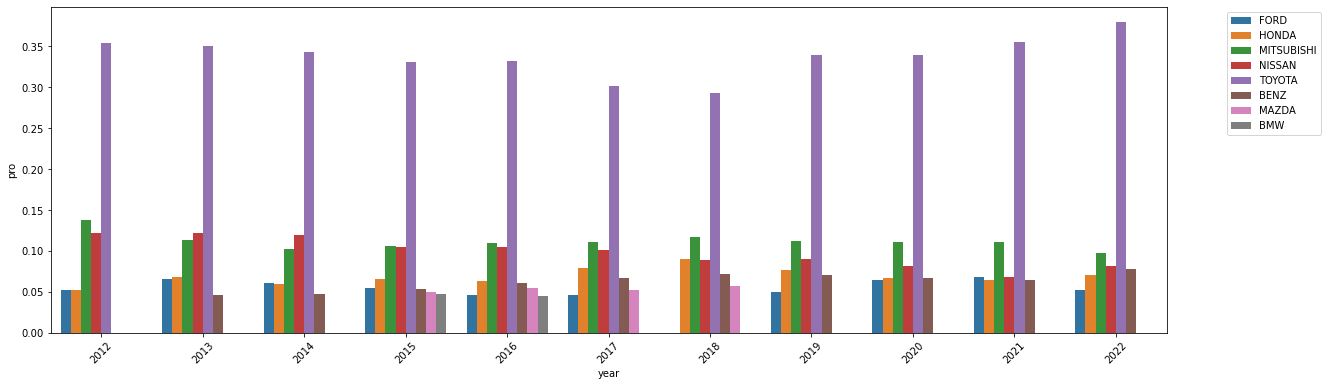

In [237]:
pro_final_field = pro_final[pro_final['pro'] > 0.04]
plt.figure(figsize=(20,6))
sns.barplot(x = pro_final_field['year'], y = pro_final_field['pro'],hue = pro_final_field['brand'])
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1))

In [238]:
pro_final_field

,1,brand,year,pro,year_strptime
215,15963,FORD,2012,0.052481,2012-01-01
233,15711,HONDA,2012,0.051652,2012-01-01
428,41796,MITSUBISHI,2012,0.137410,2012-01-01
451,37122,NISSAN,2012,0.122044,2012-01-01
599,107774,TOYOTA,2012,0.354323,2012-01-01
...,...,...,...,...,...
214,2199,FORD,2022,0.052601,2022-01-01
232,2935,HONDA,2022,0.070207,2022-01-01
427,4075,MITSUBISHI,2022,0.097476,2022-01-01
450,3408,NISSAN,2022,0.081521,2022-01-01


In [239]:
ford = go.Line(x = pro_final_field[pro_final_field['brand'] == "FORD"]['year'],y = pro_final_field[pro_final_field['brand'] == "FORD"]['pro'],name = 'FORD')
honda = go.Line(x = pro_final_field[pro_final_field['brand'] == 'HONDA']['year'],y = pro_final_field[pro_final_field['brand'] == 'HONDA']['pro'],name = "HONDA")
mitsubishi = go.Line(x = pro_final_field[pro_final_field['brand'] == 'MITSUBISHI']['year'],y = pro_final_field[pro_final_field['brand'] == 'MITSUBISHI']['pro'],name = "MITSUBISHI")
nissan = go.Line(x = pro_final_field[pro_final_field['brand'] == 'NISSAN']['year'],y = pro_final_field[pro_final_field['brand'] == 'NISSAN']['pro'],name = "NISSAN")
toyota = go.Line(x = pro_final_field[pro_final_field['brand'] == 'TOYOTA']['year'],y = pro_final_field[pro_final_field['brand'] == 'TOYOTA']['pro'],name = "TOYOTA")
benz = go.Line(x = pro_final_field[pro_final_field['brand'] == 'BENZ']['year'],y = pro_final_field[pro_final_field['brand'] == 'BENZ']['pro'],name = "BENZ")
bmw = go.Line(x = pro_final_field[pro_final_field['brand'] == 'BMW']['year'],y = pro_final_field[pro_final_field['brand'] == 'BMW']['pro'],name = "BMW")
mazada = go.Line(x = pro_final_field[pro_final_field['brand'] == 'MAZADA']['year'],y = pro_final_field[pro_final_field['brand'] == 'MAZADA']['pro'],name = "MAZADA")
data = [ford,honda,mitsubishi,nissan,toyota,benz,bmw,mazada]
layout = go.Layout(width = 1000, height = 600,barmode = "group")  
fig = go.Figure(data = data, layout = layout)
iplot(fig)

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [240]:
csv.columns

Index(['年', '月', '旬', '品牌', '產地', '區隔二〈大區隔', '區隔三〈RV不細分〉', '簡車型', '合計'], dtype='object', name=3)

In [241]:
csv.groupby(["區隔二〈大區隔",'年'])['合計'].sum()

區隔二〈大區隔  年   
RV車      2016     44879
         2017    153971
         2018    172727
         2019    175679
         2020    199518
         2021    213978
         2022     24255
         2012     97889
         2013    108400
         2014    116969
         2015    132452
         2016     98924
商車       2016      8193
         2017     30376
         2018     32031
         2019     32579
         2020     36694
         2021     39526
         2022      4145
         2012     26519
         2013     23997
         2014     25252
         2015     26908
         2016     22590
轎車       2016     50345
         2017    164303
         2018    152810
         2019    137255
         2020    126672
         2021    103927
         2022     13405
         2012    179761
         2013    175251
         2014    187094
         2015    180971
         2016    125789
Name: 合計, dtype: int64

In [242]:
csv['strptime_year']= csv['年'].apply(lambda x:datetime.strptime(str(x),"%Y"))

In [243]:
csv_category = csv.groupby(["區隔二〈大區隔",'strptime_year']).sum()
csv_category

3                          合計
區隔二〈大區隔 strptime_year        
RV車     2012-01-01      97889
        2013-01-01     108400
        2014-01-01     116969
        2015-01-01     132452
        2016-01-01     143803
        2017-01-01     153971
        2018-01-01     172727
        2019-01-01     175679
        2020-01-01     199518
        2021-01-01     213978
        2022-01-01      24255
商車      2012-01-01      26519
        2013-01-01      23997
        2014-01-01      25252
        2015-01-01      26908
        2016-01-01      30783
        2017-01-01      30376
        2018-01-01      32031
        2019-01-01      32579
        2020-01-01      36694
        2021-01-01      39526
        2022-01-01       4145
轎車      2012-01-01     179761
        2013-01-01     175251
        2014-01-01     187094
        2015-01-01     180971
        2016-01-01     176134
        2017-01-01     164303
        2018-01-01     152810
        2019-01-01     137255
        2020-01-01     126672
        2021-01-01     103927
        2022-01-01      13405

In [244]:
year = []
item = []
for x in csv_category.index:
    year.append(x[1].strftime("%Y"))
    item.append(x[0])

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/1895673227.py:3: UserWarning:

Legend does not support 'RV車' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/1895673227.py:3: UserWarning:

Legend does not support '商車' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/1895673227.py:3: UserWarning:

Legend does not support '轎車' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists



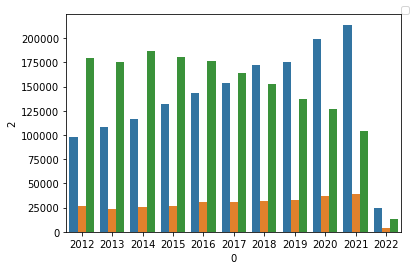

In [245]:
year_item = pd.DataFrame([year,item,csv_category['合計']]).T
sns.barplot(x = year_item[0],y = year_item[2],hue = year_item[1])
plt.legend(['RV車','商車','轎車'],["rv","business",'car'],loc = (1,1))

In [246]:
csv['區隔二〈大區隔'].unique()

array(['轎車', 'RV車', '商車'], dtype=object)

In [247]:
#北海布蘭特原油-數值
#鋼板價格-數值
#台指-指數
#港口進出口-港口別、進口貨、出口貨、國內貨物
#消費者物價指數-總指數、交通及通訊類
#國民所得資料-經濟成長(原始值)、GDP(年增率)、平均每人所得(原始值)

In [248]:
oil = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/北海布蘭特原油.xlsx")
oil = oil.iloc[2:,[0,1]]
oil['year'] = oil['PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203'].apply(lambda x:str(x).split("/")[0]).values
oil['month'] = oil['PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203'].apply(lambda x:str(x).split("/")[1]).values

In [249]:
csv['年'] = csv['年'].astype(int)
csv['月'] = csv['月'].astype(int)

In [250]:
def f(e):
    if int(e) < 10:
        return(e.replace("0",""))
    else:
        return(e)
oil['month'] = oil['month'].apply(f)
oil['month'] = oil['month'].astype(int)
oil['year'] = oil['year'].astype(int)

In [251]:
csv_adjust = csv.merge(oil,left_on=['年','月'],right_on=['year','month'])
csv_adjust

,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,strptime_year,PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203,Unnamed: 1,year,month
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012-01-01,2012/03,123.15,2012,3
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012-01-01,2012/03,123.15,2012,3
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012-01-01,2012/03,123.15,2012,3
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012-01-01,2012/03,123.15,2012,3
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012-01-01,2012/03,123.15,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141962,2022,2,4,VW,進口,RV車,SU,KOMBI 2.0,4,2022-01-01,2022/02,103.07,2022,2
141963,2022,2,4,VW,進口,RV車,SU,MULTIVAN 2.0,4,2022-01-01,2022/02,103.07,2022,2
141964,2022,2,4,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,2022-01-01,2022/02,103.07,2022,2
141965,2022,2,4,東風小康,國產,商車,小,大穩發鐵床,12,2022-01-01,2022/02,103.07,2022,2


In [252]:
steel = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/鋼板價格.xlsx")

In [253]:
steel = steel.iloc[2:,[0,1]]
steel

,PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203,Unnamed: 1
2,2022/03,29979
3,2022/02,29979
4,2022/01,29979
5,2021/12,30479
6,2021/11,30479
...,...,...
118,2012/07,23000
119,2012/06,24500
120,2012/05,24500
121,2012/04,24500


In [254]:
steel.columns

Index(['PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203', 'Unnamed: 1'], dtype='object')

In [255]:
steel['year'] = steel['PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203'].apply(lambda x:str(x).split("/")[0]).values
steel['month'] = steel['PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203'].apply(lambda x:str(x).split("/")[1]).values

In [256]:
steel

,PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203,Unnamed: 1,year,month
2,2022/03,29979,2022,03
3,2022/02,29979,2022,02
4,2022/01,29979,2022,01
5,2021/12,30479,2021,12
6,2021/11,30479,2021,11
...,...,...,...,...
118,2012/07,23000,2012,07
119,2012/06,24500,2012,06
120,2012/05,24500,2012,05
121,2012/04,24500,2012,04


In [257]:
def f(e):
    if int(e) < 10:
        return(e.replace("0",""))
    else:
        return(e)
steel['month'] = steel['month'].apply(f)
steel['month'] = steel['month'].astype(int)
steel['year'] = steel['year'].astype(int)

In [258]:
csv_adjust = csv_adjust.merge(steel,left_on=['年','月'],right_on=['year','month'])
csv_adjust

,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,strptime_year,PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203,Unnamed: 1_x,year_x,month_x,PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203,Unnamed: 1_y,year_y,month_y
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012-01-01,2012/03,123.15,2012,3,2012/03,24000,2012,3
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012-01-01,2012/03,123.15,2012,3,2012/03,24000,2012,3
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012-01-01,2012/03,123.15,2012,3,2012/03,24000,2012,3
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012-01-01,2012/03,123.15,2012,3,2012/03,24000,2012,3
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012-01-01,2012/03,123.15,2012,3,2012/03,24000,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141962,2022,2,4,VW,進口,RV車,SU,KOMBI 2.0,4,2022-01-01,2022/02,103.07,2022,2,2022/02,29979,2022,2
141963,2022,2,4,VW,進口,RV車,SU,MULTIVAN 2.0,4,2022-01-01,2022/02,103.07,2022,2,2022/02,29979,2022,2
141964,2022,2,4,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,2022-01-01,2022/02,103.07,2022,2,2022/02,29979,2022,2
141965,2022,2,4,東風小康,國產,商車,小,大穩發鐵床,12,2022-01-01,2022/02,103.07,2022,2,2022/02,29979,2022,2


In [259]:
import_export = pd.read_excel('/Users/xuzhejia/Desktop/商務數據/sove import.xlsx')
import_export

,年月,港口別,總計,進口貨,出口貨,國內貨
0,200101,國際商港,17401318,11343322,2829038,3228958
1,200101,高雄港,10321711,7250131,1824702,1246878
2,200101,臺中港,3217020,2318729,287290,611001
3,200101,基隆港,2153347,1280255,429653,443439
4,200101,花蓮港,1339840,343700,241793,754347
...,...,...,...,...,...,...
2003,202111,高雄港,10122155,6668729,2766748,686678
2004,202111,花蓮港,816405,260181,36360,519864
2005,202111,臺北港,1497662,1040516,336470,120676
2006,202111,蘇澳港,269853,143688,26935,99230


In [260]:
import_export['month'] = import_export['年月'].apply(lambda x:str(x)[4:])
import_export['year'] = import_export['年月'].apply(lambda x:str(x)[:4])

In [261]:
import_export

,年月,港口別,總計,進口貨,出口貨,國內貨,month,year
0,200101,國際商港,17401318,11343322,2829038,3228958,01,2001
1,200101,高雄港,10321711,7250131,1824702,1246878,01,2001
2,200101,臺中港,3217020,2318729,287290,611001,01,2001
3,200101,基隆港,2153347,1280255,429653,443439,01,2001
4,200101,花蓮港,1339840,343700,241793,754347,01,2001
...,...,...,...,...,...,...,...,...
2003,202111,高雄港,10122155,6668729,2766748,686678,11,2021
2004,202111,花蓮港,816405,260181,36360,519864,11,2021
2005,202111,臺北港,1497662,1040516,336470,120676,11,2021
2006,202111,蘇澳港,269853,143688,26935,99230,11,2021


In [262]:
import_export['month'] = import_export['month'].astype(int)
import_export['year'] = import_export['year'].astype(int)

In [263]:
import_export = import_export.iloc[:,[1,3,4,5,6,7]]

In [264]:
year = []
month = []
for x in import_export.groupby(['year','month']).sum().index:
    year.append(x[0])
    month.append(x[1])

In [265]:
import_export = pd.DataFrame(import_export.groupby(['year','month']).sum().values,columns = ["進口",'出口','國內貨'])

In [266]:
import_export['year'] = year
import_export['month'] = month
import_export

,進口,出口,國內貨,year,month
0,22686644,5658076,6457916,2001,1
1,21717756,6451648,5239134,2001,2
2,24707270,6939672,6497702,2001,3
3,27364198,7129382,5723624,2001,4
4,26349144,6780212,5775422,2001,5
...,...,...,...,...,...
246,27159984,8576030,5079270,2021,7
247,27475010,7928856,5688780,2021,8
248,26461888,7506336,6410496,2021,9
249,26865068,8118102,5105572,2021,10


In [267]:
csv_adjust = csv_adjust.merge(import_export,left_on = ['年','月'], right_on = ['year','month'],how = 'left')

In [268]:
consumer_index = pd.read_excel('/Users/xuzhejia/Desktop/商務數據/consumer_index.xlsx')

In [269]:
consumer_index.columns = consumer_index.iloc[1,:]
consumer_index = consumer_index.iloc[2:,:]

In [270]:
consumer_index

1,統計期,總指數,年增率(%),一.食物類,年增率(%),二.衣著類,年增率(%),三.居住類,年增率(%),四.交通及通訊類,年增率(%),五.醫藥保健類,年增率(%),六.教養娛樂類,年增率(%),七.雜項類,年增率(%)
2,101年,96.99,1.93,87.72,4.17,99.28,2.52,99.6,1.16,108.21,0.45,97.21,0.75,99.68,0.69,96.57,2.15
3,101年1月,96.37,2.36,86.61,4.54,95.77,1.96,98.72,1.24,106.78,-0.96,96.87,1.46,99.5,0.63,100.14,8.41
4,101年2月,95.09,0.24,84.79,2.13,91.86,1.66,98.61,0.73,106.86,-1.13,96.65,1.07,98.56,-1.42,95.39,-2.96
5,101年3月,95.21,1.25,84.89,3.1,89.9,2.03,98.81,1.09,107.07,-1.73,96.81,0.89,99,0.64,95.37,1.67
6,101年4月,96.09,1.44,84.64,2.12,105.91,5.7,98.79,0.94,109.17,0.14,97.08,0.65,99.37,0.93,96.38,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,111年2月,106.02,2.36,108.83,5.29,101.03,2.7,104.53,1.48,107.96,4.98,105.21,0.63,103.02,0.58,109.73,-1.07
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,註解：,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
consumer_index = consumer_index.dropna()
consumer_index

1,統計期,總指數,年增率(%),一.食物類,年增率(%),二.衣著類,年增率(%),三.居住類,年增率(%),四.交通及通訊類,年增率(%),五.醫藥保健類,年增率(%),六.教養娛樂類,年增率(%),七.雜項類,年增率(%)
2,101年,96.99,1.93,87.72,4.17,99.28,2.52,99.6,1.16,108.21,0.45,97.21,0.75,99.68,0.69,96.57,2.15
3,101年1月,96.37,2.36,86.61,4.54,95.77,1.96,98.72,1.24,106.78,-0.96,96.87,1.46,99.5,0.63,100.14,8.41
4,101年2月,95.09,0.24,84.79,2.13,91.86,1.66,98.61,0.73,106.86,-1.13,96.65,1.07,98.56,-1.42,95.39,-2.96
5,101年3月,95.21,1.25,84.89,3.1,89.9,2.03,98.81,1.09,107.07,-1.73,96.81,0.89,99,0.64,95.37,1.67
6,101年4月,96.09,1.44,84.64,2.12,105.91,5.7,98.79,0.94,109.17,0.14,97.08,0.65,99.37,0.93,96.38,2.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,110年10月,105.37,2.55,108.01,3.96,107.51,0.88,103.87,1.46,106.26,7.23,104.62,0.15,102.11,1.69,107.92,-0.26
130,110年11月,105.62,2.85,108.53,4.7,106.11,1.46,104.07,1.59,107.16,7.24,104.89,0.29,101.63,1.57,108.43,0.2
131,110年12月,105.41,2.63,108.11,4.23,105.09,1.52,104.13,1.54,105.62,5.1,105.26,0.72,101.99,2.03,108.99,0.86
132,111年1月,106.01,2.84,108.29,3.73,102.42,1.3,104.44,1.73,107.46,5.26,105.05,0.39,102.02,2.06,111.46,2.76


In [272]:
consumer_index = consumer_index[['統計期','總指數','四.交通及通訊類']]
consumer_index

1,統計期,總指數,四.交通及通訊類
2,101年,96.99,108.21
3,101年1月,96.37,106.78
4,101年2月,95.09,106.86
5,101年3月,95.21,107.07
6,101年4月,96.09,109.17
...,...,...,...
129,110年10月,105.37,106.26
130,110年11月,105.62,107.16
131,110年12月,105.41,105.62
132,111年1月,106.01,107.46


In [273]:
consumer_index['統計期'].apply(lambda x:str(x).replace("年",'/').replace("月","").split("/"))

2        [101, ]
3       [101, 1]
4       [101, 2]
5       [101, 3]
6       [101, 4]
         ...    
129    [110, 10]
130    [110, 11]
131    [110, 12]
132     [111, 1]
133     [111, 2]
Name: 統計期, Length: 132, dtype: object

In [274]:
consumer_index['year'] = consumer_index['統計期'].apply(lambda x:str(x).replace("年",'/').replace("月","").split("/")[0])
consumer_index['month'] = consumer_index['統計期'].apply(lambda x:str(x).replace("年",'/').replace("月","").split("/")[1])
consumer_index

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/2513705233.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/2513705233.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1,統計期,總指數,四.交通及通訊類,year,month
2,101年,96.99,108.21,101,
3,101年1月,96.37,106.78,101,1
4,101年2月,95.09,106.86,101,2
5,101年3月,95.21,107.07,101,3
6,101年4月,96.09,109.17,101,4
...,...,...,...,...,...
129,110年10月,105.37,106.26,110,10
130,110年11月,105.62,107.16,110,11
131,110年12月,105.41,105.62,110,12
132,111年1月,106.01,107.46,111,1


In [275]:
consumer_index['month'] = consumer_index['month'].replace("","na")
consumer_index

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/4170529802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1,統計期,總指數,四.交通及通訊類,year,month
2,101年,96.99,108.21,101,na
3,101年1月,96.37,106.78,101,1
4,101年2月,95.09,106.86,101,2
5,101年3月,95.21,107.07,101,3
6,101年4月,96.09,109.17,101,4
...,...,...,...,...,...
129,110年10月,105.37,106.26,110,10
130,110年11月,105.62,107.16,110,11
131,110年12月,105.41,105.62,110,12
132,111年1月,106.01,107.46,111,1


In [276]:
index = []
for x in range(132):
    if consumer_index['month'].values[x] != "na":
        index.append(x)
index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131]

In [277]:
consumer_index = consumer_index.iloc[index,:]
consumer_index

1,統計期,總指數,四.交通及通訊類,year,month
3,101年1月,96.37,106.78,101,1
4,101年2月,95.09,106.86,101,2
5,101年3月,95.21,107.07,101,3
6,101年4月,96.09,109.17,101,4
7,101年5月,96.57,108.16,101,5
...,...,...,...,...,...
129,110年10月,105.37,106.26,110,10
130,110年11月,105.62,107.16,110,11
131,110年12月,105.41,105.62,110,12
132,111年1月,106.01,107.46,111,1


In [278]:
consumer_index['year'] = consumer_index['year'].astype(int) + 1911

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/2433024382.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [279]:
consumer_index

1,統計期,總指數,四.交通及通訊類,year,month
3,101年1月,96.37,106.78,2012,1
4,101年2月,95.09,106.86,2012,2
5,101年3月,95.21,107.07,2012,3
6,101年4月,96.09,109.17,2012,4
7,101年5月,96.57,108.16,2012,5
...,...,...,...,...,...
129,110年10月,105.37,106.26,2021,10
130,110年11月,105.62,107.16,2021,11
131,110年12月,105.41,105.62,2021,12
132,111年1月,106.01,107.46,2022,1


In [280]:
consumer_index['month'] = consumer_index['month'].astype(int)

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/3769451767.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [281]:
csv_adjust

,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,strptime_year,...,month_x,PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203,Unnamed: 1_y,year_y,month_y,進口,出口,國內貨,year,month
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012-01-01,...,3,2012/03,24000,2012,3,27194522.0,8342402.0,5075378.0,2012.0,3.0
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012-01-01,...,3,2012/03,24000,2012,3,27194522.0,8342402.0,5075378.0,2012.0,3.0
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012-01-01,...,3,2012/03,24000,2012,3,27194522.0,8342402.0,5075378.0,2012.0,3.0
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012-01-01,...,3,2012/03,24000,2012,3,27194522.0,8342402.0,5075378.0,2012.0,3.0
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012-01-01,...,3,2012/03,24000,2012,3,27194522.0,8342402.0,5075378.0,2012.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141962,2022,2,4,VW,進口,RV車,SU,KOMBI 2.0,4,2022-01-01,...,2,2022/02,29979,2022,2,NaN,NaN,NaN,NaN,NaN
141963,2022,2,4,VW,進口,RV車,SU,MULTIVAN 2.0,4,2022-01-01,...,2,2022/02,29979,2022,2,NaN,NaN,NaN,NaN,NaN
141964,2022,2,4,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,2022-01-01,...,2,2022/02,29979,2022,2,NaN,NaN,NaN,NaN,NaN
141965,2022,2,4,東風小康,國產,商車,小,大穩發鐵床,12,2022-01-01,...,2,2022/02,29979,2022,2,NaN,NaN,NaN,NaN,NaN


In [282]:
csv_adjust = csv_adjust.merge(consumer_index,left_on = ['年','月'],right_on = ['year','month'])
csv_adjust

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'year_x', 'month_x'} in the result is deprecated and will raise a MergeError in a future version.



,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,strptime_year,...,進口,出口,國內貨,year_x,month_x,統計期,總指數,四.交通及通訊類,year_y,month_y
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012-01-01,...,27194522.0,8342402.0,5075378.0,2012.0,3.0,101年3月,95.21,107.07,2012,3
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012-01-01,...,27194522.0,8342402.0,5075378.0,2012.0,3.0,101年3月,95.21,107.07,2012,3
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012-01-01,...,27194522.0,8342402.0,5075378.0,2012.0,3.0,101年3月,95.21,107.07,2012,3
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012-01-01,...,27194522.0,8342402.0,5075378.0,2012.0,3.0,101年3月,95.21,107.07,2012,3
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012-01-01,...,27194522.0,8342402.0,5075378.0,2012.0,3.0,101年3月,95.21,107.07,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141962,2022,2,4,VW,進口,RV車,SU,KOMBI 2.0,4,2022-01-01,...,NaN,NaN,NaN,NaN,NaN,111年2月,106.02,107.96,2022,2
141963,2022,2,4,VW,進口,RV車,SU,MULTIVAN 2.0,4,2022-01-01,...,NaN,NaN,NaN,NaN,NaN,111年2月,106.02,107.96,2022,2
141964,2022,2,4,VW,進口,RV車,SU,TOURAN 1.5 TSI,2,2022-01-01,...,NaN,NaN,NaN,NaN,NaN,111年2月,106.02,107.96,2022,2
141965,2022,2,4,東風小康,國產,商車,小,大穩發鐵床,12,2022-01-01,...,NaN,NaN,NaN,NaN,NaN,111年2月,106.02,107.96,2022,2


In [283]:
gpd = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/國民所得.xlsx")

In [284]:
gdp = gpd.dropna()
gdp

,,經濟成長(%),國內生產毛額GDP(名目值，百萬元),平均每人所得(名目值，元)
0,,原始值,年增率(%),原始值
1,2012Q1,1.09,0.59,133393
2,2012Q2,1.04,2.6,130318
3,2012Q3,2.18,3.17,136296
4,2012Q4,4.48,5.25,137014
5,2013Q1,1.5,2.73,139023
6,2013Q2,2.68,4.51,136317
7,2013Q3,1.95,3.08,143769
8,2013Q4,3.73,5.79,146089
9,2014Q1,4.69,5.27,147923


In [285]:
gdp = gdp.iloc[1:,:]
gdp

,,經濟成長(%),國內生產毛額GDP(名目值，百萬元),平均每人所得(名目值，元)
1,2012Q1,1.09,0.59,133393
2,2012Q2,1.04,2.6,130318
3,2012Q3,2.18,3.17,136296
4,2012Q4,4.48,5.25,137014
5,2013Q1,1.5,2.73,139023
6,2013Q2,2.68,4.51,136317
7,2013Q3,1.95,3.08,143769
8,2013Q4,3.73,5.79,146089
9,2014Q1,4.69,5.27,147923
10,2014Q2,4.92,6.59,148307


In [286]:
gdp.columns = ['year','經濟成長(%)','國內生產毛額GDP(名目值，百萬元)','平均每人所得(名目值，元)']

In [287]:
gdp

,year,經濟成長(%),國內生產毛額GDP(名目值，百萬元),平均每人所得(名目值，元)
1,2012Q1,1.09,0.59,133393
2,2012Q2,1.04,2.6,130318
3,2012Q3,2.18,3.17,136296
4,2012Q4,4.48,5.25,137014
5,2013Q1,1.5,2.73,139023
6,2013Q2,2.68,4.51,136317
7,2013Q3,1.95,3.08,143769
8,2013Q4,3.73,5.79,146089
9,2014Q1,4.69,5.27,147923
10,2014Q2,4.92,6.59,148307


In [288]:
growth = []
gdp_domestic = []
income = []
for x in range(40):
    for y in range(3):
        growth.append(gdp.iloc[x,1])
        gdp_domestic.append(gdp.iloc[x,2])
        income.append(gdp.iloc[x,3])

In [289]:
new_gdp = pd.DataFrame([growth,gdp_domestic,income]).T
new_gdp

,0,1,2
0,1.09,0.59,133393.0
1,1.09,0.59,133393.0
2,1.09,0.59,133393.0
3,1.04,2.60,130318.0
4,1.04,2.60,130318.0
...,...,...,...
115,4.37,6.91,197066.0
116,4.37,6.91,197066.0
117,4.86,8.68,214296.0
118,4.86,8.68,214296.0


In [290]:
year_month = []
for x in range(2012,2022):
    for y in range(1,13):
        year_month.append(str(x) + "/" + str(y))
year_month

['2012/1',
 '2012/2',
 '2012/3',
 '2012/4',
 '2012/5',
 '2012/6',
 '2012/7',
 '2012/8',
 '2012/9',
 '2012/10',
 '2012/11',
 '2012/12',
 '2013/1',
 '2013/2',
 '2013/3',
 '2013/4',
 '2013/5',
 '2013/6',
 '2013/7',
 '2013/8',
 '2013/9',
 '2013/10',
 '2013/11',
 '2013/12',
 '2014/1',
 '2014/2',
 '2014/3',
 '2014/4',
 '2014/5',
 '2014/6',
 '2014/7',
 '2014/8',
 '2014/9',
 '2014/10',
 '2014/11',
 '2014/12',
 '2015/1',
 '2015/2',
 '2015/3',
 '2015/4',
 '2015/5',
 '2015/6',
 '2015/7',
 '2015/8',
 '2015/9',
 '2015/10',
 '2015/11',
 '2015/12',
 '2016/1',
 '2016/2',
 '2016/3',
 '2016/4',
 '2016/5',
 '2016/6',
 '2016/7',
 '2016/8',
 '2016/9',
 '2016/10',
 '2016/11',
 '2016/12',
 '2017/1',
 '2017/2',
 '2017/3',
 '2017/4',
 '2017/5',
 '2017/6',
 '2017/7',
 '2017/8',
 '2017/9',
 '2017/10',
 '2017/11',
 '2017/12',
 '2018/1',
 '2018/2',
 '2018/3',
 '2018/4',
 '2018/5',
 '2018/6',
 '2018/7',
 '2018/8',
 '2018/9',
 '2018/10',
 '2018/11',
 '2018/12',
 '2019/1',
 '2019/2',
 '2019/3',
 '2019/4',
 '2019/5',


In [291]:
new_gdp['year_month'] = year_month

In [292]:
new_gdp

,0,1,2,year_month
0,1.09,0.59,133393.0,2012/1
1,1.09,0.59,133393.0,2012/2
2,1.09,0.59,133393.0,2012/3
3,1.04,2.60,130318.0,2012/4
4,1.04,2.60,130318.0,2012/5
...,...,...,...,...
115,4.37,6.91,197066.0,2021/8
116,4.37,6.91,197066.0,2021/9
117,4.86,8.68,214296.0,2021/10
118,4.86,8.68,214296.0,2021/11


In [293]:
new_gdp

,0,1,2,year_month
0,1.09,0.59,133393.0,2012/1
1,1.09,0.59,133393.0,2012/2
2,1.09,0.59,133393.0,2012/3
3,1.04,2.60,130318.0,2012/4
4,1.04,2.60,130318.0,2012/5
...,...,...,...,...
115,4.37,6.91,197066.0,2021/8
116,4.37,6.91,197066.0,2021/9
117,4.86,8.68,214296.0,2021/10
118,4.86,8.68,214296.0,2021/11


In [294]:
new_gdp['year'] = new_gdp['year_month'].apply(lambda x:x.split("/")[0])
new_gdp['month'] = new_gdp['year_month'].apply(lambda x:x.split("/")[1])
new_gdp.columns = ['economic growht(per)','gdp(million)','income average','year_month','year','month']

In [295]:
new_gdp['year'] = new_gdp['year'].astype(int)
new_gdp['month'] = new_gdp['month'].astype(int)

In [296]:
csv_adjust = csv_adjust.merge(new_gdp,left_on=['年','月'],right_on=['year','month'])
csv_adjust

,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,strptime_year,...,總指數,四.交通及通訊類,year_y,month_y,economic growht(per),gdp(million),income average,year_month,year,month
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012-01-01,...,95.21,107.07,2012,3,1.09,0.59,133393.0,2012/3,2012,3
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012-01-01,...,95.21,107.07,2012,3,1.09,0.59,133393.0,2012/3,2012,3
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012-01-01,...,95.21,107.07,2012,3,1.09,0.59,133393.0,2012/3,2012,3
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012-01-01,...,95.21,107.07,2012,3,1.09,0.59,133393.0,2012/3,2012,3
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012-01-01,...,95.21,107.07,2012,3,1.09,0.59,133393.0,2012/3,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,2021-01-01,...,105.41,105.62,2021,12,4.86,8.68,214296.0,2021/12,2021,12
140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,2021-01-01,...,105.41,105.62,2021,12,4.86,8.68,214296.0,2021/12,2021,12
140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,2021-01-01,...,105.41,105.62,2021,12,4.86,8.68,214296.0,2021/12,2021,12
140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,2021-01-01,...,105.41,105.62,2021,12,4.86,8.68,214296.0,2021/12,2021,12


In [297]:
csv_adjust.to_excel('/Users/xuzhejia/Desktop/商務數據/整理後資料集.xlsx')

In [298]:
leader = pd.read_excel('/Users/xuzhejia/Desktop/商務數據/leader.xlsx')
leader

,Unnamed: 0,景氣對策信號(分),領先指標綜合指數(點),時間
0,2022-01-12,13,89.40,2012-01-01
1,2022-02-12,15,90.18,2012-02-01
2,2022-03-12,14,90.68,2012-03-01
3,2022-04-12,14,90.93,2012-04-01
4,2022-05-12,15,91.01,2012-05-01
...,...,...,...,...
116,2022-09-21,38,134.10,2021-09-01
117,2022-10-21,39,135.41,2021-10-01
118,2022-11-21,37,136.44,2021-11-01
119,2022-12-21,38,137.38,2021-12-01


In [299]:
leader['時間'] = leader['時間'].apply(lambda x:x.strftime("%Y-%m-%d"))

In [300]:
leader['year'] = leader['時間'].apply(lambda x:x.split("-")[0])
leader['month'] = leader['時間'].apply(lambda x:x.split("-")[1])
leader

,Unnamed: 0,景氣對策信號(分),領先指標綜合指數(點),時間,year,month
0,2022-01-12,13,89.40,2012-01-01,2012,01
1,2022-02-12,15,90.18,2012-02-01,2012,02
2,2022-03-12,14,90.68,2012-03-01,2012,03
3,2022-04-12,14,90.93,2012-04-01,2012,04
4,2022-05-12,15,91.01,2012-05-01,2012,05
...,...,...,...,...,...,...
116,2022-09-21,38,134.10,2021-09-01,2021,09
117,2022-10-21,39,135.41,2021-10-01,2021,10
118,2022-11-21,37,136.44,2021-11-01,2021,11
119,2022-12-21,38,137.38,2021-12-01,2021,12


In [336]:
#新裝
q = []
for x in leader['month'].values:
    if int(x) < 10:
        q.append(str(x).replace("0",""))
    else:
        q.append(str(x))
leader['time'] = leader['year'].astype(str) + '/' + q

In [339]:
csv = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/整理後資料集.xlsx")
csv

,Unnamed: 0,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,總指數,四.交通及通訊類,year_y.1,month_y.1,economic growht(per),gdp(million),income average,year_month,year,month
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,95.21,107.07,2012,3,1.09,0.59,133393,2012/3,2012,3
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,95.21,107.07,2012,3,1.09,0.59,133393,2012/3,2012,3
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,95.21,107.07,2012,3,1.09,0.59,133393,2012/3,2012,3
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,95.21,107.07,2012,3,1.09,0.59,133393,2012/3,2012,3
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,95.21,107.07,2012,3,1.09,0.59,133393,2012/3,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,105.41,105.62,2021,12,4.86,8.68,214296,2021/12,2021,12
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,105.41,105.62,2021,12,4.86,8.68,214296,2021/12,2021,12
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,105.41,105.62,2021,12,4.86,8.68,214296,2021/12,2021,12
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,105.41,105.62,2021,12,4.86,8.68,214296,2021/12,2021,12


In [340]:
csv = csv.merge(leader,left_on = 'year_month',right_on = 'time')
csv

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'year_x', 'month_x'} in the result is deprecated and will raise a MergeError in a future version.



,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,year_month,year_x,month_x,Unnamed: 0_y,景氣對策信號(分),領先指標綜合指數(點),時間,year_y,month_y,time
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012,03,2012/3
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012,03,2012/3
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012,03,2012/3
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012,03,2012/3
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012,03,2012/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021,12,2021/12
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021,12,2021/12
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021,12,2021/12
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021,12,2021/12


In [341]:
csv = csv.iloc[:,:-3]

In [342]:
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,economic growht(per),gdp(million),income average,year_month,year_x,month_x,Unnamed: 0_y,景氣對策信號(分),領先指標綜合指數(點),時間
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,1.09,0.59,133393,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,1.09,0.59,133393,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,1.09,0.59,133393,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,1.09,0.59,133393,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,1.09,0.59,133393,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,4.86,8.68,214296,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,4.86,8.68,214296,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,4.86,8.68,214296,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,4.86,8.68,214296,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01


In [343]:
employ = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/emply.xlsx")
employ

,,就業人數(千人),失業率(%)
0,2012M01,10808,4.18
1,2012M02,10790,4.25
2,2012M03,10806,4.17
3,2012M04,10818,4.10
4,2012M05,10834,4.12
...,...,...,...
116,2021M09,11417,3.96
117,2021M10,11445,3.83
118,2021M11,11477,3.66
119,2021M12,11480,3.64


In [344]:
employ['year'] = employ[" "].apply(lambda x:x.split("M")[0]).astype(int)
employ['month'] = employ[' '].apply(lambda x:x.split("M")[1]).astype(int)

In [345]:
employ

,,就業人數(千人),失業率(%),year,month
0,2012M01,10808,4.18,2012,1
1,2012M02,10790,4.25,2012,2
2,2012M03,10806,4.17,2012,3
3,2012M04,10818,4.10,2012,4
4,2012M05,10834,4.12,2012,5
...,...,...,...,...,...
116,2021M09,11417,3.96,2021,9
117,2021M10,11445,3.83,2021,10
118,2021M11,11477,3.66,2021,11
119,2021M12,11480,3.64,2021,12


In [346]:
csv = csv.merge(employ,left_on=['年','月'],right_on=['year','month'])
csv = csv.iloc[:,:-2]
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,year_month,year_x,month_x,Unnamed: 0_y,景氣對策信號(分),領先指標綜合指數(點),時間,,就業人數(千人),失業率(%)
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,2012/3,2012,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,2021/12,2021,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64


In [347]:
industry = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/industry.xlsx")
industry

,月份,總指數
0,2012M01,78.08
1,2012M02,84.12
2,2012M03,94.57
3,2012M04,91.46
4,2012M05,94.52
...,...,...
116,2021M09,138.76
117,2021M10,135.60
118,2021M11,137.05
119,2021M12,140.78


In [348]:
industry['year'] = industry["月份"].apply(lambda x:x.split("M")[0]).astype(int)
industry['month'] = industry['月份'].apply(lambda x:x.split("M")[1]).astype(int)

In [349]:
csv = csv.merge(industry,left_on=['年','月'],right_on=['year','month'])
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,景氣對策信號(分),領先指標綜合指數(點),時間,,就業人數(千人),失業率(%),月份,總指數_y,year,month
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012,3
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012,3
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012,3
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012,3
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021,12
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021,12
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021,12
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021,12


In [350]:
csv = csv.iloc[:,:-2]
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,month_x,Unnamed: 0_y,景氣對策信號(分),領先指標綜合指數(點),時間,,就業人數(千人),失業率(%),月份,總指數_y
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,3,2022-03-12,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,12,2022-12-21,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78


In [351]:
transform = pd.read_excel("/Users/xuzhejia/Desktop/商務數據/運輸.xlsx")
transform

,,物價指數(運輸費)
0,2012M01,100.41
1,2012M02,97.31
2,2012M03,97.00
3,2012M04,97.69
4,2012M05,97.60
...,...,...
117,2021M10,119.00
118,2021M11,118.64
119,2021M12,118.71
120,2022M01,119.51


In [352]:
transform['year'] = transform[" "].apply(lambda x:x.split("M")[0]).astype(int)
transform['month'] = transform[' '].apply(lambda x:x.split("M")[1]).astype(int)

In [353]:
transform

,,物價指數(運輸費),year,month
0,2012M01,100.41,2012,1
1,2012M02,97.31,2012,2
2,2012M03,97.00,2012,3
3,2012M04,97.69,2012,4
4,2012M05,97.60,2012,5
...,...,...,...,...
117,2021M10,119.00,2021,10
118,2021M11,118.64,2021,11
119,2021M12,118.71,2021,12
120,2022M01,119.51,2022,1


In [354]:
csv = csv.merge(transform,left_on=['年','月'],right_on=['year','month'])
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,時間,_x,就業人數(千人),失業率(%),月份,總指數_y,_y,物價指數(運輸費),year,month
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00,2012,3
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00,2012,3
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00,2012,3
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00,2012,3
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00,2012,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71,2021,12
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71,2021,12
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71,2021,12
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71,2021,12


In [355]:
csv = csv.iloc[:,:-2]

In [356]:
csv

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,景氣對策信號(分),領先指標綜合指數(點),時間,_x,就業人數(千人),失業率(%),月份,總指數_y,_y,物價指數(運輸費)
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71


In [357]:
csv1 = csv.iloc[:1000000,:]

In [358]:
csv2 = csv.iloc[1000000:,:]

In [359]:
csv1.to_csv('/Users/xuzhejia/Desktop/商務數據/整理後資料集_前段.csv')

In [360]:
csv2.to_csv('/Users/xuzhejia/Desktop/商務數據/整理後資料集_後段.csv')

In [361]:
csv1

,Unnamed: 0_x,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,...,景氣對策信號(分),領先指標綜合指數(點),時間,_x,就業人數(千人),失業率(%),月份,總指數_y,_y,物價指數(運輸費)
0,0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
1,1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
2,2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
3,3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
4,4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,...,14,90.68,2012-03-01,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140247,140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140248,140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140249,140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,...,38,137.38,2021-12-01,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71


In [362]:
csv1.columns

Index(['Unnamed: 0_x', '年', '月', '旬', '品牌', '產地', '區隔二〈大區隔', '區隔三〈RV不細分〉',
       '簡車型', '合計', 'strptime_year',
       'PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203', 'Unnamed: 1_x', 'year_x',
       'month_x', 'PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203', 'Unnamed: 1_y',
       'year_y', 'month_y', '進口', '出口', '國內貨', 'year_x.1', 'month_x.1', '統計期',
       '總指數_x', '四.交通及通訊類', 'year_y.1', 'month_y.1', 'economic growht(per)',
       'gdp(million)', 'income average', 'year_month', 'year_x', 'month_x',
       'Unnamed: 0_y', '景氣對策信號(分)', '領先指標綜合指數(點)', '時間', ' _x', '就業人數(千人)',
       '失業率(%)', '月份', '總指數_y', ' _y', '物價指數(運輸費)'],
      dtype='object')

In [363]:
csv_fin = csv.loc[:,['年', '月', '旬', '品牌', '產地', '區隔二〈大區隔', '區隔三〈RV不細分〉',
       '簡車型', '合計','PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203','Unnamed: 1_x','PA1205 鋼板-中鋼基價(頓)(TWD) -- 201203-202203','Unnamed: 1_y'
          ,'進口', '出口', '國內貨','總指數_x', '四.交通及通訊類','economic growht(per)',
       'gdp(million)', 'income average','景氣對策信號(分)', '領先指標綜合指數(點)', ' _x', '就業人數(千人)', '失業率(%)',
       '月份', '總指數_y', ' _y', '物價指數(運輸費)']]

In [398]:
mm = list(oil['Unnamed: 1'][3:].values)
mm.reverse()
nn = list(steel['Unnamed: 1'][3:].values)
nn.reverse()

In [399]:
#針對整體車市預測
sum_by_month = []
signal_by_month = list(leader['景氣對策信號(分)'][2:-1].values) #景氣對策
leader_policy_by_month = list(leader['領先指標綜合指數(點)'][2:-1].values) #領先指標
oil_price = mm  #油價
steel_price = nn #鋼鐵
data = csv_fin.groupby('月份')
for x,y in data:
    sum_by_month.append(data.get_group(x)['合計'].sum())

In [396]:
csv_fin

,年,月,旬,品牌,產地,區隔二〈大區隔,區隔三〈RV不細分〉,簡車型,合計,PA15 北海布蘭特原油現貨(平均)(桶)(USD) -- 201203-202203,...,income average,景氣對策信號(分),領先指標綜合指數(點),_x,就業人數(千人),失業率(%),月份,總指數_y,_y,物價指數(運輸費)
0,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A4 2.0,1,2012/03,...,133393,14,90.68,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
1,2012,3,1,AUDI,進口,轎車,UP-MEDIUM,A6 2.8,1,2012/03,...,133393,14,90.68,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
2,2012,3,1,AUDI,進口,轎車,SPORTS CAR,TT 2.0,1,2012/03,...,133393,14,90.68,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
3,2012,3,1,AUDI,進口,轎車,LUXURY,A6 3.0T QUATTRO,1,2012/03,...,133393,14,90.68,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
4,2012,3,1,AUDI,進口,轎車,ECOI,A1 1.4,2,2012/03,...,133393,14,90.68,2012M03,10806,4.17,2012M03,94.57,2012M03,97.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140246,2021,12,6,VW,進口,RV車,SU,KOMBI 2.0,23,2021/12,...,214296,38,137.38,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140247,2021,12,6,VW,進口,RV車,SU,MULTIVAN 2.0,7,2021/12,...,214296,38,137.38,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140248,2021,12,6,東風小康,國產,商車,輕,穩發,1,2021/12,...,214296,38,137.38,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71
140249,2021,12,6,東風小康,國產,商車,小,大穩發鐵床,35,2021/12,...,214296,38,137.38,2021M12,11480,3.64,2021M12,140.78,2021M12,118.71


In [427]:
data = csv_fin.groupby('月份')
sum_by_month = []
income = []
signal_by_month = []
leader_policy_by_month = []
oil_price_by_month = []
steel_price_by_month = []
import_by_month = []
export_by_month = []
trafic_index_by_month = []
price_index = []
price_index_trafic = []
gdp_growth = []
gdp = []
unemployee_rate = []
for x,y in data:
    sum_by_month.append(data.get_group(x)['合計'].sum())
    income.append(data.get_group(x)['income average'].values[0])
    oil_price_by_month.append(data.get_group(x)['Unnamed: 1_x'].values[0])
    steel_price_by_month.append(data.get_group(x)['Unnamed: 1_y'].values[0])
    leader_policy_by_month.append(data.get_group(x)['領先指標綜合指數(點)'].values[0])
    import_by_month.append(data.get_group(x)['進口'].values[0])
    export_by_month.append(data.get_group(x)['出口'].values[0])
    trafic_index_by_month.append(data.get_group(x)['四.交通及通訊類'].values[0])
    price_index.append(data.get_group(x)['總指數_x'].values[0])
    price_index_trafic.append(data.get_group(x)['物價指數(運輸費)'].values[0])
    gdp_growth.append(data.get_group(x)['economic growht(per)'].values[0])
    gdp.append(data.get_group(x)['gdp(million)'].values[0])
    unemployee_rate.append(data.get_group(x)['失業率(%)'].values[0])
    signal_by_month.append(data.get_group(x)['景氣對策信號(分)'].values[0])

In [428]:
date = []
for x,y in data:
    date.append(x)

In [429]:
data_by_month = pd.DataFrame([date,sum_by_month,income,signal_by_month,leader_policy_by_month,oil_price_by_month,steel_price_by_month,import_by_month,
             export_by_month,trafic_index_by_month,price_index,price_index_trafic,gdp_growth,gdp,unemployee_rate]).T
data_by_month

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522.0,8342402.0,107.07,95.21,97.0,1.09,0.59,4.17
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862.0,7773734.0,109.17,96.09,97.69,1.04,2.6,4.1
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174.0,8115286.0,108.16,96.57,97.6,1.04,2.6,4.12
3,2012M06,24943,130318,15,91.0,96.13,24500,26508428.0,7578136.0,106.96,97.19,97.92,1.04,2.6,4.21
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134.0,7922212.0,107.33,97.56,98.81,2.18,3.17,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010.0,7928856.0,105.3,104.9,117.88,4.37,6.91,4.24
114,2021M09,33612,197066,38,134.1,77.8,28979,26461888.0,7506336.0,105.42,105.06,118.19,4.37,6.91,3.96
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068.0,8118102.0,106.26,105.37,119.0,4.86,8.68,3.83
116,2021M11,31240,214296,37,136.44,70.83,30479,29068396.0,8526896.0,107.16,105.62,118.64,4.86,8.68,3.66


In [432]:
data_by_month.columns = ['date','sum_by_month','income_average','景氣燈','領先指標','oil price','steel price','import'
                        ,'export','trafice_index','price_index','price_index_trafic','gdp_growth','gdp(百萬)','unemployee_rate']

In [433]:
data_by_month

,date,sum_by_month,income_average,景氣燈,領先指標,oil price,steel price,import,export,trafice_index,price_index,price_index_trafic,gdp_growth,gdp(百萬),unemployee_rate
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522.0,8342402.0,107.07,95.21,97.0,1.09,0.59,4.17
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862.0,7773734.0,109.17,96.09,97.69,1.04,2.6,4.1
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174.0,8115286.0,108.16,96.57,97.6,1.04,2.6,4.12
3,2012M06,24943,130318,15,91.0,96.13,24500,26508428.0,7578136.0,106.96,97.19,97.92,1.04,2.6,4.21
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134.0,7922212.0,107.33,97.56,98.81,2.18,3.17,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010.0,7928856.0,105.3,104.9,117.88,4.37,6.91,4.24
114,2021M09,33612,197066,38,134.1,77.8,28979,26461888.0,7506336.0,105.42,105.06,118.19,4.37,6.91,3.96
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068.0,8118102.0,106.26,105.37,119.0,4.86,8.68,3.83
116,2021M11,31240,214296,37,136.44,70.83,30479,29068396.0,8526896.0,107.16,105.62,118.64,4.86,8.68,3.66


In [438]:
data_by_month['time'] = data_by_month['date'].apply(lambda x:datetime.strptime(x,'%YM%m'))

In [439]:
data_by_month

,date,sum_by_month,income_average,景氣燈,領先指標,oil price,steel price,import,export,trafice_index,price_index,price_index_trafic,gdp_growth,gdp(百萬),unemployee_rate,time
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522.0,8342402.0,107.07,95.21,97.0,1.09,0.59,4.17,2012-03-01
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862.0,7773734.0,109.17,96.09,97.69,1.04,2.6,4.1,2012-04-01
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174.0,8115286.0,108.16,96.57,97.6,1.04,2.6,4.12,2012-05-01
3,2012M06,24943,130318,15,91.0,96.13,24500,26508428.0,7578136.0,106.96,97.19,97.92,1.04,2.6,4.21,2012-06-01
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134.0,7922212.0,107.33,97.56,98.81,2.18,3.17,4.31,2012-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010.0,7928856.0,105.3,104.9,117.88,4.37,6.91,4.24,2021-08-01
114,2021M09,33612,197066,38,134.1,77.8,28979,26461888.0,7506336.0,105.42,105.06,118.19,4.37,6.91,3.96,2021-09-01
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068.0,8118102.0,106.26,105.37,119.0,4.86,8.68,3.83,2021-10-01
116,2021M11,31240,214296,37,136.44,70.83,30479,29068396.0,8526896.0,107.16,105.62,118.64,4.86,8.68,3.66,2021-11-01


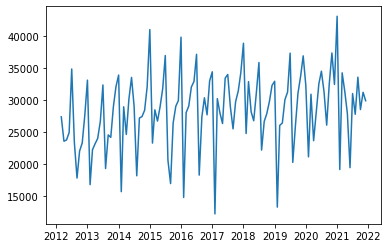

In [440]:
plt.plot(data_by_month['time'],data_by_month['sum_by_month'])

In [880]:
result = seasonal_decompose(data_by_month['sum_by_month'], model='additive', period=12)

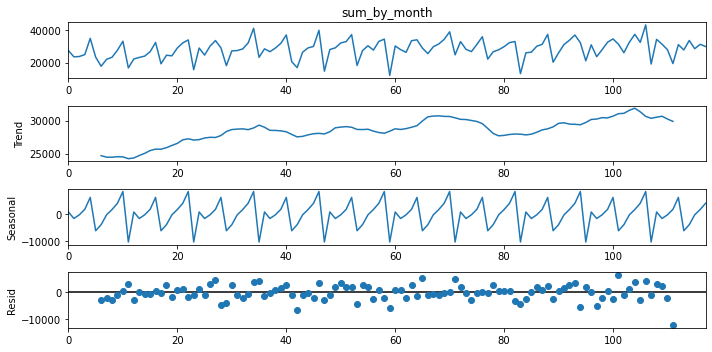

<Figure size 2880x720 with 0 Axes>

In [456]:
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [461]:
adfuller(data_by_month['sum_by_month'])[1]

0.24968355712635454

In [465]:
adfuller(data_by_month['sum_by_month'].diff(1)[1:])  #一階差分後變成定態

(-6.449816434856251,
 1.533398176551449e-08,
 10,
 106,
 {'1%': -3.4936021509366793,
  '5%': -2.8892174239808703,
  '10%': -2.58153320754717},
 2023.6405828347483)

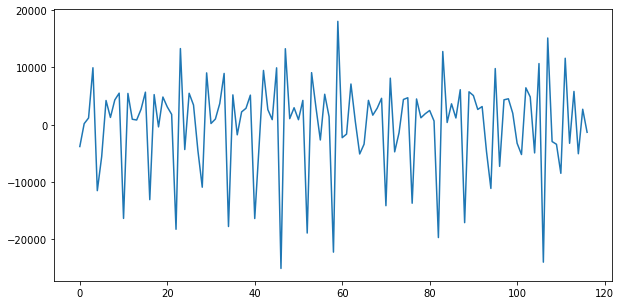

In [472]:
plt.plot(range(len(data_by_month['sum_by_month'].diff(1)[1:])),data_by_month['sum_by_month'].diff(1)[1:])

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/3618253110.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



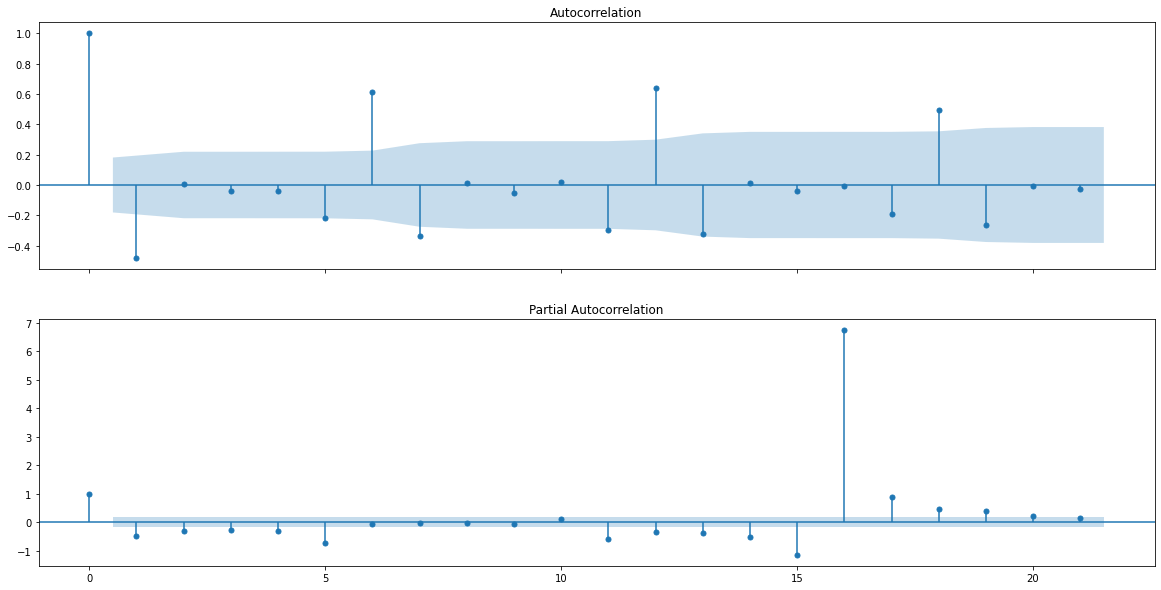

In [476]:
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(20,10))
plot_acf(data_by_month['sum_by_month'].diff(1)[1:], ax=axes[0])
plot_pacf(data_by_month['sum_by_month'].diff(1).dropna(),zero=True,ax = axes[1]).show()

In [500]:
auto_arima(data_by_month['sum_by_month'],seasonal=True,m = 12).summary()

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning:

Error fitting  ARIMA(5,1,1)(2,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  118
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1141.917
Date:                            Wed, 13 Apr 2022   AIC                           2301.834
Time:                                    17:10:23   BIC                           2326.694
Sample:                                         0   HQIC                          2311.927
                                            - 118                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1568      0.169      0.925      0.355      -0.175       0.489
ar.L2         -0.0463      0.202     -0.229      0.819      -0.443       0.350
ar.L3         -0.0046      0.151     -0.031      0.975      -0.300       0.291
ar.L4         -0.0123      0.166     -0.074      0.941      -0.337       0.312
ar.L5          0.0798      0.123      0.649      0.516      -0.161       0.320
ma.L1         -0.9411      0.063    -15.052      0.000      -1.064      -0.819
ar.S.L12       0.9722      0.046     20.937      0.000       0.881       1.063
ma.S.L12      -0.7657      0.217     -3.521      0.000      -1.192      -0.339
sigma2      2.204e+07   5.84e-09   3.78e+15      0.000     2.2e+07     2.2e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 8.93
Prob(Q):                              0.33   Prob(JB):                         0.01
Heteroskedasticity (H):               1.09   Skew:                            -0.24
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.88e+30. Standard errors may be unstable.
"""

In [511]:
data_by_month_dropna = data_by_month.dropna()

In [541]:
train_data = data_by_month_dropna.iloc[:76,:]
test_data = data_by_month_dropna.iloc[76:,:]

In [553]:
s = SARIMAX(data_by_month_dropna['sum_by_month'].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.iloc[:,2:-1].astype(float).values)

In [554]:
results = s.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27410D+01    |proj g|=  5.94634D+02



 This problem is unconstrained.


At iterate    5    f=  1.18700D+01    |proj g|=  3.61124D+01

At iterate   10    f=  1.03885D+01    |proj g|=  1.01833D+00

At iterate   15    f=  1.03826D+01    |proj g|=  4.91456D+00

At iterate   20    f=  1.01567D+01    |proj g|=  2.20238D+01

At iterate   25    f=  1.01357D+01    |proj g|=  3.85650D-01

At iterate   30    f=  1.01302D+01    |proj g|=  1.19314D+01

At iterate   35    f=  1.01079D+01    |proj g|=  8.45774D-01

At iterate   40    f=  1.01075D+01    |proj g|=  3.41001D+00

At iterate   45    f=  1.01000D+01    |proj g|=  1.40018D+01

At iterate   50    f=  1.00959D+01    |proj g|=  1.92548D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  117
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1181.219
Date:                            Wed, 13 Apr 2022   AIC                           2406.438
Time:                                    17:44:06   BIC                           2467.017
Sample:                                         0   HQIC                          2431.030
                                            - 117                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6122      0.119      5.155      0.000       0.379       0.845
x2          -861.6366    271.336     -3.176      0.001   -1393.445    -329.828
x3            89.2287    832.328      0.107      0.915   -1542.103    1720.561
x4           -17.6497    103.316     -0.171      0.864    -220.146     184.847
x5            -0.2441      1.038     -0.235      0.814      -2.279       1.791
x6             0.0008      0.000      3.660      0.000       0.000       0.001
x7            -0.0002      0.001     -0.201      0.841      -0.002       0.002
x8           150.8104    821.815      0.184      0.854   -1459.918    1761.539
x9         -2450.6617    767.802     -3.192      0.001   -3955.527    -945.796
x10          922.0714    450.295      2.048      0.041      39.510    1804.633
x11         1472.8301   1114.460      1.322      0.186    -711.472    3657.133
x12         -983.0095    936.707     -1.049      0.294   -2818.922     852.903
x13        -1.888e+04     72.413   -260.751      0.000    -1.9e+04   -1.87e+04
ar.L1          0.2455     57.405      0.004      0.997    -112.266     112.757
ar.L2          0.0471      5.312      0.009      0.993     -10.364      10.458
ar.L3          0.0027      0.908      0.003      0.998      -1.777       1.782
ar.L4          0.0221      0.456      0.049      0.961      -0.872       0.916
ar.L5         -0.0091      1.424     -0.006      0.995      -2.799       2.781
ma.L1         -0.3380     57.414     -0.006      0.995    -112.867     112.191
ar.S.L12       0.7108      0.136      5.225      0.000       0.444       0.977
ma.S.L12      -0.5919      0.166     -3.560      0.000      -0.918      -0.266
sigma2      2.767e+07      0.045   6.14e+08      0.000    2.77e+07    2.77e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                10.69
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.69
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.06e+24. Standard errors may be unstable.
"""

In [557]:
ans = results.predict(start = 90,end = 116)
ans

array([21828.90044252, 31518.16441751, 29468.16960045, 31411.60912878,
       31373.91415951, 32513.50973778, 30147.18265205, 22302.98869922,
       21157.58553365, 30178.19024794, 45891.99269711, 30786.04088225,
       30046.72890975, 34166.17052526, 37610.51718985, 33511.28498275,
       31760.85599499, 32599.28070931, 28739.94175467, 32376.15052071,
       23680.46773581, 16061.47719511, 26448.25817327, 32763.59737454,
       34652.59702513, 43530.36288503, 36589.11411032])

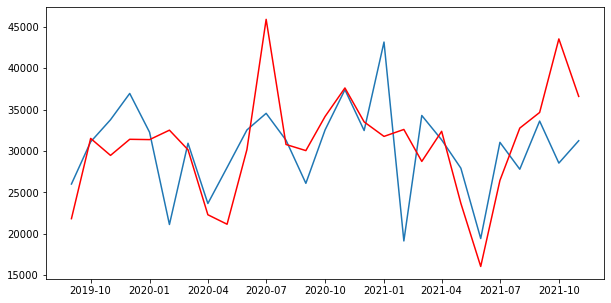

In [562]:
plt.plot(data_by_month_dropna['time'][90:117],data_by_month_dropna['sum_by_month'][90:117])
plt.plot(data_by_month_dropna['time'][90:117],ans,color = 'red')

In [565]:
data_by_month_dropna.to_csv('/Users/xuzhejia/Desktop/商務數據/模型ㄧ.csv')

In [641]:
data_by_month_dropna = pd.read_csv('/Users/xuzhejia/Desktop/商務數據/模型ㄧ.csv',encoding = 'big5')
data_by_month_dropna = data_by_month_dropna.iloc[:,1:]

In [642]:
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,price_index,price_index_trafic,gdp_growth,gdp(曇),unemployee_rate,疫情,time
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,95.21,97.00,1.09,0.59,4.17,0,2012/3/1
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,96.09,97.69,1.04,2.60,4.10,0,2012/4/1
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,96.57,97.60,1.04,2.60,4.12,0,2012/5/1
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,97.19,97.92,1.04,2.60,4.21,0,2012/6/1
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,97.56,98.81,2.18,3.17,4.31,0,2012/7/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,104.29,117.53,4.37,6.91,4.53,835,2021/7/1
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,104.90,117.88,4.37,6.91,4.24,313,2021/8/1
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,105.06,118.19,4.37,6.91,3.96,233,2021/9/1
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,105.37,119.00,4.86,8.68,3.83,183,2021/10/1


In [649]:
s = SARIMAX(data_by_month_dropna['sum_by_month'][:70].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.iloc[:70,[2,5,6,9,10,11,12,14]].astype(float).values)

In [650]:
results = s.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66888D+01    |proj g|=  1.19620D+01

At iterate    5    f=  1.01174D+01    |proj g|=  8.42710D-01

At iterate   10    f=  1.00930D+01    |proj g|=  1.22327D-01


 This problem is unconstrained.



At iterate   15    f=  1.00894D+01    |proj g|=  7.60549D-03

At iterate   20    f=  1.00880D+01    |proj g|=  1.81769D-01

At iterate   25    f=  1.00747D+01    |proj g|=  1.09125D-01

At iterate   30    f=  1.00712D+01    |proj g|=  1.32783D-01

At iterate   35    f=  1.00696D+01    |proj g|=  1.29781D-02

At iterate   40    f=  1.00694D+01    |proj g|=  5.82458D-02

At iterate   45    f=  1.00598D+01    |proj g|=  3.85258D-01

At iterate   50    f=  1.00555D+01    |proj g|=  4.32706D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     55      1     0     0   4.327D-02   1.006D+01
  F =   10.0554859483

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   70
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -703.884
Date:                            Wed, 13 Apr 2022   AIC                           1441.768
Time:                                    18:31:42   BIC                           1479.748
Sample:                                         0   HQIC                          1456.836
                                             - 70                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7113      0.329      2.160      0.031       0.066       1.357
x2          -235.9242    186.106     -1.268      0.205    -600.685     128.837
x3             0.0241      1.916      0.013      0.990      -3.731       3.780
x4           888.8374   1687.094      0.527      0.598   -2417.806    4195.481
x5         -3102.7472   1567.415     -1.980      0.048   -6174.824     -30.670
x6          -261.7006    952.787     -0.275      0.784   -2129.129    1605.728
x7            16.7554   1163.316      0.014      0.989   -2263.301    2296.812
x8          -4.23e+04   1.43e+04     -2.965      0.003   -7.03e+04   -1.43e+04
ar.L1          0.9654      0.077     12.491      0.000       0.814       1.117
ar.L2          0.0178      0.125      0.143      0.887      -0.227       0.262
ar.L3          0.0236      0.174      0.136      0.892      -0.318       0.365
ar.L4          0.0096      0.126      0.076      0.939      -0.238       0.257
ar.L5         -0.0362      0.043     -0.841      0.401      -0.121       0.048
ma.L1         -0.9861      0.074    -13.293      0.000      -1.132      -0.841
ar.S.L12       0.9890      0.196      5.037      0.000       0.604       1.374
ma.S.L12      -0.9711      0.300     -3.240      0.001      -1.559      -0.384
sigma2      3.914e+07      1.044   3.75e+07      0.000    3.91e+07    3.91e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 2.86
Prob(Q):                              0.49   Prob(JB):                         0.24
Heteroskedasticity (H):               1.31   Skew:                            -0.50
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.45e+23. Standard errors may be unstable.
"""

In [652]:
ans = results.forecast(steps = 25,exog = data_by_month_dropna.iloc[70:95,[2,5,6,9,10,11,12,14]].astype(float).values)

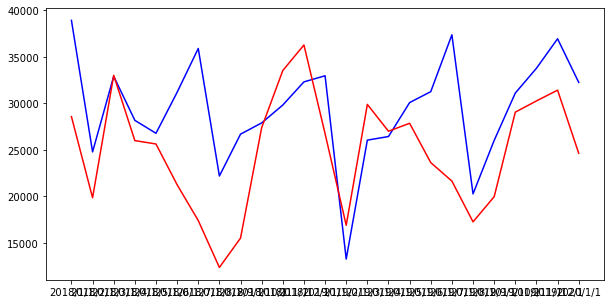

In [653]:
plt.plot(data_by_month_dropna['time'][70:95],data_by_month_dropna['sum_by_month'][70:95],color = 'blue')
plt.plot(data_by_month_dropna['time'][70:95],ans,color = 'red')

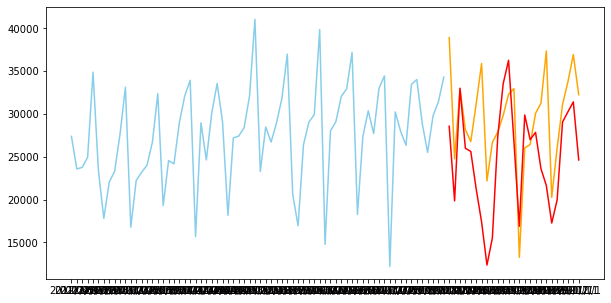

In [657]:
plt.plot(data_by_month_dropna['time'][:70],data_by_month_dropna['sum_by_month'][:70],color = 'skyblue')
plt.plot(data_by_month_dropna['time'][70:95],data_by_month_dropna['sum_by_month'][70:95],color = 'orange')
plt.plot(data_by_month_dropna['time'][70:95],ans,color = 'red')

In [659]:
data_by_month_dropna['last month'] = [0].extend(data_by_month_dropna['sum_by_month'][1:-1])

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,price_index,price_index_trafic,gdp_growth,gdp(曇),unemployee_rate,疫情,time
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,95.21,97.00,1.09,0.59,4.17,0,2012/3/1
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,96.09,97.69,1.04,2.60,4.10,0,2012/4/1
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,96.57,97.60,1.04,2.60,4.12,0,2012/5/1
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,97.19,97.92,1.04,2.60,4.21,0,2012/6/1
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,97.56,98.81,2.18,3.17,4.31,0,2012/7/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,104.29,117.53,4.37,6.91,4.53,835,2021/7/1
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,104.90,117.88,4.37,6.91,4.24,313,2021/8/1
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,105.06,118.19,4.37,6.91,3.96,233,2021/9/1
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,105.37,119.00,4.86,8.68,3.83,183,2021/10/1


In [671]:
last = [27390]
last_last = last.extend(data_by_month_dropna['sum_by_month'][:-1])
last_last

In [672]:
last

[27390,
 27390,
 23581,
 23769,
 24943,
 34893,
 23374,
 17805,
 22033,
 23304,
 27630,
 33142,
 16774,
 22238,
 23192,
 24014,
 26708,
 32391,
 19300,
 24559,
 24181,
 29019,
 32130,
 33938,
 15672,
 28972,
 24637,
 30128,
 33567,
 29077,
 18162,
 27214,
 27426,
 28414,
 32108,
 41065,
 23282,
 28493,
 26728,
 28967,
 31834,
 36999,
 20613,
 16941,
 26418,
 29053,
 29938,
 39873,
 14766,
 28041,
 29100,
 32065,
 32940,
 37187,
 18264,
 27359,
 30378,
 27713,
 33034,
 34447,
 12190,
 30245,
 27983,
 26346,
 33456,
 34028,
 28918,
 25515,
 29769,
 31437,
 34316,
 38926,
 24781,
 32911,
 28173,
 26781,
 31191,
 35903,
 22189,
 26687,
 27896,
 29821,
 32309,
 32966,
 13255,
 26044,
 26433,
 30082,
 31259,
 37371,
 20265,
 26012,
 31106,
 33773,
 36947,
 32256,
 21125,
 30935,
 23660,
 28010,
 32541,
 34546,
 31305,
 26096,
 32544,
 37396,
 32470,
 43151,
 19141,
 34286,
 31345,
 27926,
 19434,
 31043,
 27797,
 33612,
 28539]

In [673]:
data_by_month_dropna['last_month'] = last

In [674]:
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,price_index,price_index_trafic,gdp_growth,gdp(曇),unemployee_rate,疫情,time,last_month
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,95.21,97.00,1.09,0.59,4.17,0,2012/3/1,27390
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,96.09,97.69,1.04,2.60,4.10,0,2012/4/1,27390
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,96.57,97.60,1.04,2.60,4.12,0,2012/5/1,23581
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,97.19,97.92,1.04,2.60,4.21,0,2012/6/1,23769
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,97.56,98.81,2.18,3.17,4.31,0,2012/7/1,24943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,104.29,117.53,4.37,6.91,4.53,835,2021/7/1,19434
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,104.90,117.88,4.37,6.91,4.24,313,2021/8/1,31043
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,105.06,118.19,4.37,6.91,3.96,233,2021/9/1,27797
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,105.37,119.00,4.86,8.68,3.83,183,2021/10/1,33612


In [812]:
alert = []
for x in data_by_month_dropna['date']:
    if x in ['2021M03','2021M04','2021M05','2021M06','2021M07','2021M08','2021M09','2021M10','2021M11']:
        alert.append(1)
    else:
        alert.append(0)
alert

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [813]:
data_by_month_dropna['alert_3'] = alert

In [814]:
data_by_month_dropna['疫情']

0        0
1        0
2        0
3        0
4        0
      ... 
112    835
113    313
114    233
115    183
116    192
Name: 疫情, Length: 117, dtype: int64

In [825]:
zscore = preprocessing.StandardScaler()
data_minmax = zscore.fit_transform(data_by_month_dropna['疫情'].values.reshape(-1,1))

In [826]:
data_by_month_dropna['疫情標準化'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,1.000000,0.523673,0.036617,0.776441,0.144515
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,0.962092,0.560432,0.000000,0.909436,0.139241
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,0.802619,0.560432,0.000000,0.845472,0.139241
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.750784,0.560432,0.000000,0.769474,0.139241
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,0.835824,0.450154,0.071185,0.792907,0.259494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.580889,0.889722,0.794827,0.677011,0.490506
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.543165,0.889722,0.794827,0.664345,0.490506
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.581719,0.889722,0.794827,0.671944,0.490506
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.633278,1.000000,1.000000,0.725142,0.542194


In [827]:
s = SARIMAX(data_by_month_dropna['sum_by_month'][:101].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.loc[:100,['income_average','oil price','steel price','trafice_index',
                                                 'price_index','price_index_trafic','gdp_growth','unemployee_rate',
                                                'last_month','alert_3','疫情標準化']].astype(float).values)

In [828]:
result = s.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49384D+01    |proj g|=  1.03352D+01

At iterate    5    f=  1.00512D+01    |proj g|=  1.55911D-01


 This problem is unconstrained.



At iterate   10    f=  1.00268D+01    |proj g|=  4.44259D-02

At iterate   15    f=  1.00248D+01    |proj g|=  3.80503D-02

At iterate   20    f=  1.00246D+01    |proj g|=  4.96852D-02

At iterate   25    f=  1.00199D+01    |proj g|=  2.16780D-01

At iterate   30    f=  1.00172D+01    |proj g|=  6.09205D-02

At iterate   35    f=  1.00169D+01    |proj g|=  2.86210D-03

At iterate   40    f=  1.00168D+01    |proj g|=  2.38405D-03

At iterate   45    f=  1.00168D+01    |proj g|=  1.46287D-02

At iterate   50    f=  1.00152D+01    |proj g|=  1.27624D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     54   

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1011.534
Date:                            Wed, 13 Apr 2022   AIC                           2063.068
Time:                                    22:04:34   BIC                           2115.171
Sample:                                         0   HQIC                          2084.155
                                            - 101                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3929      0.220      1.783      0.075      -0.039       0.825
x2            50.3375    131.342      0.383      0.702    -207.088     307.763
x3             1.1132      1.829      0.609      0.543      -2.471       4.698
x4          -967.3589   1068.354     -0.905      0.365   -3061.294    1126.576
x5         -2494.9719    996.728     -2.503      0.012   -4448.523    -541.421
x6          1640.6325    525.836      3.120      0.002     610.012    2671.252
x7          -425.2041   1000.232     -0.425      0.671   -2385.623    1535.214
x8         -4.029e+04   1.16e+04     -3.467      0.001   -6.31e+04   -1.75e+04
x9            -0.2558      0.145     -1.760      0.078      -0.541       0.029
const               0    222.653          0      1.000    -436.391     436.391
x10        -6068.9650   4.96e+04     -0.122      0.903   -1.03e+05    9.12e+04
ar.L1          0.6533      0.970      0.674      0.500      -1.247       2.554
ar.L2          0.0155      0.061      0.256      0.798      -0.104       0.135
ar.L3          0.0226      0.093      0.243      0.808      -0.160       0.205
ar.L4          0.0225      0.073      0.310      0.757      -0.120       0.165
ar.L5         -0.0361      0.040     -0.892      0.372      -0.115       0.043
ma.L1         -0.6789      0.975     -0.696      0.486      -2.590       1.233
ar.S.L12       0.9658      0.124      7.762      0.000       0.722       1.210
ma.S.L12      -0.9377      0.153     -6.113      0.000      -1.238      -0.637
sigma2      3.029e+07     89.642   3.38e+05      0.000    3.03e+07    3.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                11.48
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.63   Skew:                            -0.81
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.85e+21. Standard errors may be unstable.
"""

In [829]:
answer = result.predict(start = 1,end = 100)

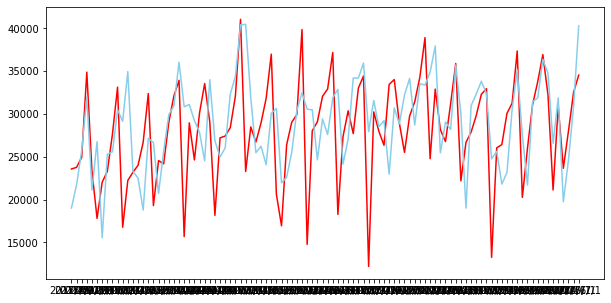

In [830]:
plt.plot(data_by_month_dropna['time'][1:101],data_by_month_dropna['sum_by_month'][1:101],color = 'red')
plt.plot(data_by_month_dropna['time'][1:101],answer,color = 'skyblue')

In [833]:
data_minmax = zscore.fit_transform(data_by_month_dropna['oil price'].values.reshape(-1,1))

In [834]:
data_by_month_dropna['oil price standard'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.523673,0.036617,0.776441,0.144515
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.560432,0.000000,0.909436,0.139241
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.560432,0.000000,0.845472,0.139241
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.560432,0.000000,0.769474,0.139241
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.450154,0.071185,0.792907,0.259494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,0.889722,0.794827,0.677011,0.490506
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,0.889722,0.794827,0.664345,0.490506
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,0.889722,0.794827,0.671944,0.490506
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,1.000000,1.000000,0.725142,0.542194


In [835]:
data_minmax = zscore.fit_transform(data_by_month_dropna['steel price'].values.reshape(-1,1))
data_by_month_dropna['steel price standard'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,0.036617,0.776441,0.144515
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,0.000000,0.909436,0.139241
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,0.000000,0.845472,0.139241
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,0.000000,0.769474,0.139241
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,0.071185,0.792907,0.259494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,0.794827,0.677011,0.490506
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,0.794827,0.664345,0.490506
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,0.794827,0.671944,0.490506
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,1.000000,0.725142,0.542194


In [836]:
s = SARIMAX(data_by_month_dropna['sum_by_month'][:101].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.loc[:100,['income_average','steel price standard','trafice_index',
                                                 'price_index','price_index_trafic','gdp_growth','unemployee_rate',
                                                'last_month','alert_3','疫情標準化','oil price standard']].astype(float).values)

In [837]:
result = s.fit()
result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51984D+01    |proj g|=  1.08705D+01

At iterate    5    f=  1.00533D+01    |proj g|=  1.64310D-01

At iterate   10    f=  1.00290D+01    |proj g|=  7.67279D-02

At iterate   15    f=  1.00274D+01    |proj g|=  1.09896D-01

At iterate   20    f=  1.00270D+01    |proj g|=  1.13244D-02

At iterate   25    f=  1.00261D+01    |proj g|=  3.58091D-02

At iterate   30    f=  1.00241D+01    |proj g|=  2.14716D-01

At iterate   35    f=  1.00222D+01    |proj g|=  1.69417D-02

At iterate   40    f=  1.00208D+01    |proj g|=  6.28674D-02

At iterate   45    f=  1.00179D+01    |proj g|=  1.48465D-01

At iterate   50    f=  1.00124D+01    |proj g|=  1.09043D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1011.253
Date:                            Wed, 13 Apr 2022   AIC                           2062.506
Time:                                    22:05:53   BIC                           2114.609
Sample:                                         0   HQIC                          2083.593
                                            - 101                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4429      0.200      2.219      0.026       0.052       0.834
x2           611.3696   4341.527      0.141      0.888   -7897.866    9120.606
x3          -967.3244   1168.389     -0.828      0.408   -3257.326    1322.677
x4         -2494.9411    991.678     -2.516      0.012   -4438.593    -551.289
x5          1640.6393    520.914      3.150      0.002     619.666    2661.612
x6          -425.2085    918.898     -0.463      0.644   -2226.216    1375.799
x7         -4.029e+04   1.11e+04     -3.621      0.000   -6.21e+04   -1.85e+04
x8            -0.2519      0.148     -1.700      0.089      -0.542       0.038
const       1.626e-12      0.753   2.16e-12      1.000      -1.476       1.476
x9         -6068.9654   1122.024     -5.409      0.000   -8268.091   -3869.839
x10         1285.9062   3342.100      0.385      0.700   -5264.490    7836.302
ar.L1          0.9300      0.153      6.081      0.000       0.630       1.230
ar.L2          0.0136      0.123      0.110      0.912      -0.228       0.256
ar.L3          0.0177      0.125      0.142      0.887      -0.227       0.263
ar.L4          0.0073      0.069      0.106      0.916      -0.129       0.143
ar.L5         -0.0323      0.030     -1.066      0.286      -0.092       0.027
ma.L1         -0.9416      0.144     -6.541      0.000      -1.224      -0.659
ar.S.L12       0.9974      0.090     11.059      0.000       0.821       1.174
ma.S.L12      -0.9871      0.232     -4.256      0.000      -1.442      -0.533
sigma2      3.029e+07      0.902   3.36e+07      0.000    3.03e+07    3.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                12.43
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.83
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.14e+23. Standard errors may be unstable.
"""

In [721]:
answer = result.predict(start = 1,end = 100)

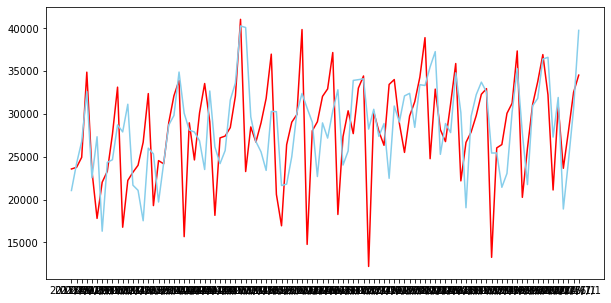

In [722]:
plt.plot(data_by_month_dropna['time'][1:101],data_by_month_dropna['sum_by_month'][1:101],color = 'red')
plt.plot(data_by_month_dropna['time'][1:101],answer,color = 'skyblue')

In [838]:
data_minmax = zscore.fit_transform(data_by_month_dropna['income_average'].values.reshape(-1,1))
data_by_month_dropna['income average standard'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.776441,0.144515
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,0.909436,0.139241
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,0.845472,0.139241
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.769474,0.139241
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,0.792907,0.259494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.677011,0.490506
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.664345,0.490506
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.671944,0.490506
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.725142,0.542194


In [839]:
s = SARIMAX(data_by_month_dropna['sum_by_month'][:101].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.loc[:100,['income average standard','steel price standard','trafice_index',
                                                 'price_index','price_index_trafic','gdp_growth','unemployee_rate',
                                                'last_month','alert_3','疫情標準化','oil price standard']].astype(float).values)

In [840]:
result = s.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           20     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.72017D+01    |proj g|=  1.49979D+01

At iterate    5    f=  1.00597D+01    |proj g|=  3.35839D-01


 This problem is unconstrained.



At iterate   10    f=  1.00380D+01    |proj g|=  6.80887D-02

At iterate   15    f=  1.00364D+01    |proj g|=  4.83459D-03

At iterate   20    f=  1.00361D+01    |proj g|=  7.87664D-02

At iterate   25    f=  1.00326D+01    |proj g|=  3.85221D-02

At iterate   30    f=  1.00309D+01    |proj g|=  8.60454D-02

At iterate   35    f=  1.00271D+01    |proj g|=  1.22336D-01

At iterate   40    f=  1.00197D+01    |proj g|=  1.01054D-01

At iterate   45    f=  1.00158D+01    |proj g|=  4.58354D-02

At iterate   50    f=  1.00139D+01    |proj g|=  8.36088D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   20     50     64   

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  101
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1011.402
Date:                            Wed, 13 Apr 2022   AIC                           2062.803
Time:                                    22:06:25   BIC                           2114.907
Sample:                                         0   HQIC                          2083.891
                                            - 101                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          6872.2655   4001.536      1.717      0.086    -970.601    1.47e+04
x2           611.3705   4096.533      0.149      0.881   -7417.687    8640.428
x3          -967.3294   1157.608     -0.836      0.403   -3236.200    1301.542
x4         -2494.9464    994.866     -2.508      0.012   -4444.848    -545.045
x5          1640.6321    513.809      3.193      0.001     633.585    2647.679
x6          -425.2106    891.246     -0.477      0.633   -2172.020    1321.599
x7         -4.029e+04   1.15e+04     -3.505      0.000   -6.28e+04   -1.78e+04
x8            -0.2478      0.139     -1.789      0.074      -0.519       0.024
const        2.12e-12      0.712   2.98e-12      1.000      -1.395       1.395
x9         -6068.9654   1152.853     -5.264      0.000   -8328.516   -3809.415
x10         1285.9059   3317.180      0.388      0.698   -5215.648    7787.460
ar.L1          0.9555      0.095     10.019      0.000       0.769       1.142
ar.L2          0.0151      0.020      0.748      0.454      -0.024       0.055
ar.L3          0.0119      0.062      0.193      0.847      -0.109       0.133
ar.L4          0.0137      0.072      0.190      0.849      -0.127       0.155
ar.L5         -0.0312      0.030     -1.045      0.296      -0.090       0.027
ma.L1         -0.9712      0.098     -9.930      0.000      -1.163      -0.779
ar.S.L12       0.9983      0.074     13.507      0.000       0.853       1.143
ma.S.L12      -0.9905      0.218     -4.543      0.000      -1.418      -0.563
sigma2      3.029e+07      0.447   6.78e+07      0.000    3.03e+07    3.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                12.01
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.82
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.92e+25. Standard errors may be unstable.
"""

In [841]:
answer = result.predict(start = 1,end = 100)

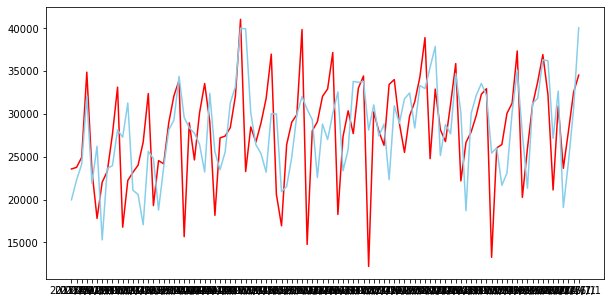

In [842]:
plt.plot(data_by_month_dropna['time'][1:101],data_by_month_dropna['sum_by_month'][1:101],color = 'red')
plt.plot(data_by_month_dropna['time'][1:101],answer,color = 'skyblue')

In [843]:
data_minmax = zscore.fit_transform(data_by_month_dropna['trafice_index'].values.reshape(-1,1))
data_by_month_dropna['trafic index standard'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,0.144515
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,0.139241
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,0.139241
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,0.139241
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,0.259494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.490506
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.490506
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.490506
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.542194


In [844]:
data_minmax = zscore.fit_transform(data_by_month_dropna['gdp_growth'].values.reshape(-1,1))
data_by_month_dropna['gdp_growth standard'] = data_minmax.reshape(117,1)
data_by_month_dropna

,date,sum_by_month,income_average,舀除,Unnamed: 5,oil price,steel price,import,export,trafice_index,...,疫情,time,last_month,alert_3,疫情標準化,oil price standard,steel price standard,income average standard,trafic index standard,gdp_growth standard
0,2012M03,27390,133393,14,90.68,123.15,24000,27194522,8342402,107.07,...,0,2012/3/1,27390,0,-0.157423,2.040468,0.611379,-1.668303,0.954616,-1.122633
1,2012M04,23581,130318,14,90.93,119.04,24500,30225862,7773734,109.17,...,0,2012/4/1,27390,0,-0.157423,1.879700,0.802280,-1.836515,1.541531,-1.148868
2,2012M05,23769,130318,15,91.01,101.75,24500,27769174,8115286,108.16,...,0,2012/5/1,23581,0,-0.157423,1.203377,0.802280,-1.836515,1.259253,-1.148868
3,2012M06,24943,130318,15,91.00,96.13,24500,26508428,7578136,106.96,...,0,2012/6/1,23769,0,-0.157423,0.983543,0.802280,-1.836515,0.923872,-1.148868
4,2012M07,34893,136296,16,90.96,105.35,23000,30329134,7922212,107.33,...,0,2012/7/1,24943,0,-0.157423,1.344196,0.229577,-1.509501,1.027281,-0.550710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2021M07,31043,197066,38,131.26,77.71,28979,27159984,8576030,105.50,...,835,2021/7/1,19434,1,0.772693,0.263019,2.512370,1.814795,0.515826,0.598382
113,2021M08,27797,197066,39,132.68,73.62,28979,27475010,7928856,105.30,...,313,2021/8/1,31043,1,0.191231,0.103033,2.512370,1.814795,0.459930,0.598382
114,2021M09,33612,197066,38,134.10,77.80,28979,26461888,7506336,105.42,...,233,2021/9/1,27797,1,0.102118,0.266540,2.512370,1.814795,0.493468,0.598382
115,2021M10,28539,214296,39,135.41,83.39,30479,26865068,8118102,106.26,...,183,2021/10/1,33612,1,0.046423,0.485200,3.085073,2.757327,0.728234,0.855484


In [861]:
s = SARIMAX(data_by_month_dropna['sum_by_month'][:50].astype(int).values,
            order = (5,1,1),
            seasonal_order=(1,0,1,12),
            exog = data_by_month_dropna.loc[:49,['income_average','steel price',
                                                 'price_index','price_index_trafic','unemployee_rate',
                                                'last_month','oil price standard','alert_3']].astype(float).values)

In [862]:
result = s.fit()
result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65314D+01    |proj g|=  3.51463D+01

At iterate    5    f=  9.99135D+00    |proj g|=  5.44544D-01

At iterate   10    f=  9.97877D+00    |proj g|=  1.26001D-01


 This problem is unconstrained.



At iterate   15    f=  9.97132D+00    |proj g|=  1.80594D-01

At iterate   20    f=  9.96681D+00    |proj g|=  3.26945D-01

At iterate   25    f=  9.96482D+00    |proj g|=  1.94229D-02

At iterate   30    f=  9.96133D+00    |proj g|=  4.38919D-01

At iterate   35    f=  9.94976D+00    |proj g|=  1.41893D-01

At iterate   40    f=  9.94920D+00    |proj g|=  2.32515D-02

At iterate   45    f=  9.94912D+00    |proj g|=  1.70192D-02

At iterate   50    f=  9.94911D+00    |proj g|=  1.63411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     54      1     0     0   1.634D-03   9.949D+00
  F =   9.94910692289

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   50
Model:             SARIMAX(5, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -497.455
Date:                            Wed, 13 Apr 2022   AIC                           1028.911
Time:                                    22:12:37   BIC                           1061.072
Sample:                                         0   HQIC                          1041.113
                                             - 50                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7626      0.662      1.152      0.249      -0.535       2.061
x2            -1.2121      2.574     -0.471      0.638      -6.256       3.832
x3         -2917.2077   1434.752     -2.033      0.042   -5729.271    -105.145
x4          -466.5985   1271.462     -0.367      0.714   -2958.618    2025.421
x5         -3.919e+04   1.94e+04     -2.017      0.044   -7.73e+04   -1103.179
x6            -0.2293      0.219     -1.049      0.294      -0.658       0.199
x7          1418.9272   4879.045      0.291      0.771   -8143.825     1.1e+04
const               0   7483.631          0      1.000   -1.47e+04    1.47e+04
ar.L1          0.7428      0.456      1.627      0.104      -0.152       1.637
ar.L2          0.0053      0.119      0.045      0.965      -0.228       0.238
ar.L3          0.0138      0.187      0.074      0.941      -0.353       0.381
ar.L4          0.0054      0.149      0.036      0.971      -0.287       0.298
ar.L5         -0.0258      0.043     -0.603      0.546      -0.110       0.058
ma.L1         -0.7455      0.452     -1.650      0.099      -1.631       0.140
ar.S.L12       0.8050      3.482      0.231      0.817      -6.019       7.629
ma.S.L12      -0.8006      3.489     -0.229      0.819      -7.639       6.038
sigma2      3.151e+07     12.152   2.59e+06      0.000    3.15e+07    3.15e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 4.17
Prob(Q):                              0.43   Prob(JB):                         0.12
Heteroskedasticity (H):               2.43   Skew:                            -0.71
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.4e+22. Standard errors may be unstable.
"""

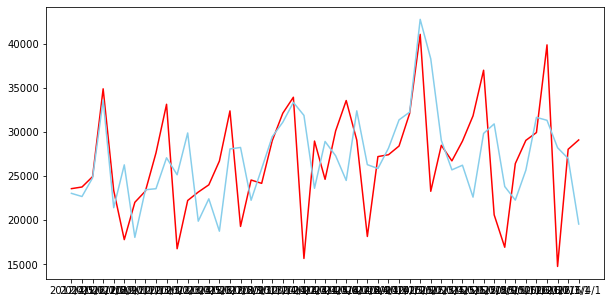

In [865]:
answer = result.predict(start = 1,end = 49)
plt.plot(data_by_month_dropna['time'][1:50],data_by_month_dropna['sum_by_month'][1:50],color = 'red')
plt.plot(data_by_month_dropna['time'][1:50],answer,color = 'skyblue')

In [869]:
ans = result.forecast(steps = 20,exog = data_by_month_dropna.loc[50:69,['income_average','steel price',
                                                 'price_index','price_index_trafic','unemployee_rate',
                                                'last_month','oil price standard','alert_3']].astype(float).values)

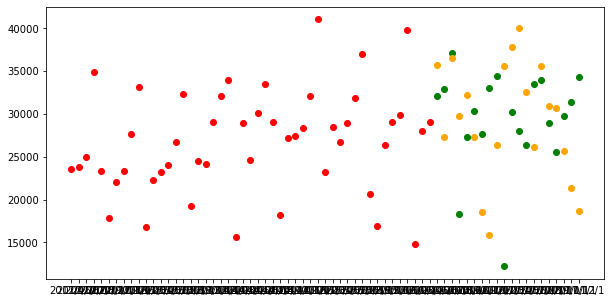

In [879]:
plt.scatter(data_by_month_dropna['time'][1:50],data_by_month_dropna['sum_by_month'][1:50],color = 'red')
plt.scatter(data_by_month_dropna['time'][50:70],data_by_month_dropna['sum_by_month'][50:70],color = 'green')
plt.scatter(data_by_month_dropna['time'][50:70],ans,color = 'orange')

In [872]:
ans = []
b = 70
for x in range(20):
    answer = result.forecast(steps = 1,exog = data_by_month_dropna.loc[b,['income_average','steel price',
                                                 'price_index','price_index_trafic','unemployee_rate',
                                                'last_month','oil price standard','alert_3']].astype(float).values)
    ans.append(answer[0])
    b += 1

In [873]:
ans

[35788.76589082426,
 27268.709869431215,
 36560.97839630768,
 29724.92798712803,
 32171.0621124538,
 27373.301814921026,
 18507.668473030033,
 15872.42546378891,
 26370.248398356605,
 35565.605970201665,
 37878.442186693195,
 40013.39620048209,
 32590.55361268844,
 26176.257612448768,
 35588.824828127516,
 30904.15343495086,
 30715.315358327003,
 25718.36684508511,
 21400.564971323824,
 18642.725858738646]

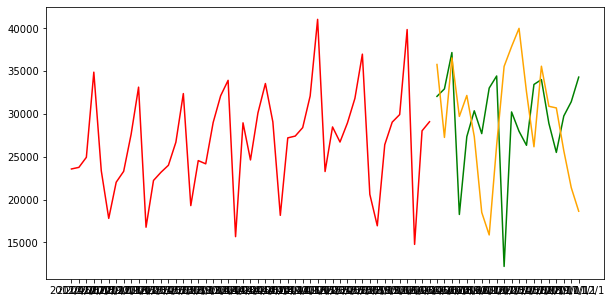

In [875]:
plt.plot(data_by_month_dropna['time'][1:50],data_by_month_dropna['sum_by_month'][1:50],color = 'red')
plt.plot(data_by_month_dropna['time'][50:70],data_by_month_dropna['sum_by_month'][50:70],color = 'green')
plt.plot(data_by_month_dropna['time'][50:70],ans,color = 'orange')

In [878]:
data_by_month_dropna.to_csv('/Users/xuzhejia/Desktop/商務數據/模型使用表格.csv')

In [882]:
result.seasonal

0       766.552758
1     -1660.525945
2      -275.387056
3      1745.173129
4      6179.856578
          ...     
113   -6195.351755
114   -3949.998167
115    -288.646316
116    1676.052758
117    4010.312018
Name: seasonal, Length: 118, dtype: float64

/Users/xuzhejia/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt

/var/folders/_0/d81h2sdj5z1b6t7hh803swth0000gn/T/ipykernel_12130/2487797980.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



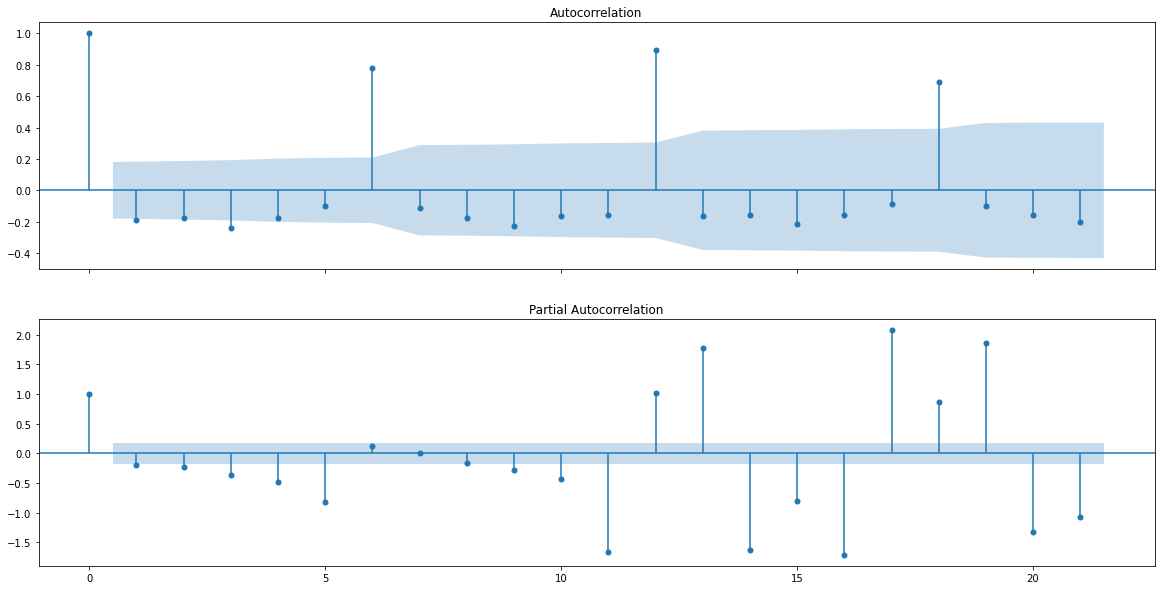

In [883]:
fig, axes = plt.subplots(2, 1, sharex=True,figsize=(20,10))
plot_acf(result.seasonal, ax=axes[0])
plot_pacf(result.seasonal,zero=True,ax = axes[1]).show()

In [4]:
import numpy as np
np.array([[1,3,0,2,-1],[0,0,1,4,-3],[0,0,0,0,0]]).dot(np.array([[-3,-2,1],[1,0,0],[0,-4,3],[0,1,0],[0,0,1]]))

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])